In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve
import datetime

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam 

## Generate Baseline network

In [4]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [5]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 2256.12it/s]


In [6]:
# Calculate dataframe length of nodes and edges of metro for adding it to tram dataframes
id_edges_length_sub = len(edges)
id_nodes_length_sub = len(nodes)

In [7]:
# id_nodes_length_sub

In [8]:
# id_edges_length_sub

In [9]:
# create copy dataframe for nodes and edges
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [10]:
# delete useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [11]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [12]:
# city_sub_nodes

In [13]:
# city_sub_stations

In [14]:
# city_sub_edges

In [15]:
# city_sub_routes

In [16]:
# Define replacement dictionary of names of destination stations
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [17]:
# # restore DataFrames as pickle files
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [18]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [19]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [20]:
# revise station sequence of 52 routes
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [21]:
# city_sub_order_route_dict

In [22]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [23]:
# Create a graph representing the subway network using the extracted undirected edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [24]:
# city_sub_all_shortest_paths_id_dict

In [25]:
# city_sub_edges

In [26]:
# Obtain the right ordered edges dataframe of metro
city_sub_ordered_edges = edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges)

In [27]:
# city_sub_ordered_edges

In [28]:
# Create a graph representing the subway network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_sub_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_sub_ordered_edges[['from_id', 'to_id', 'time', 'distance']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[3]}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list
G.add_edges_from(edges_list)

In [29]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs_dict = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges_dict = city_sub_order_id_pairs.copy()
city_sub_edges_dict = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges_dict[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs_dict[line], city_sub_ordered_edges)
    
# Plot all subway routes
# plot_routes(city_sub_routes, city_sub_ordered_edges, city_sub_shortest_path_edges_dict)

## Obtain dataframes of edges,nodes and stations for baseline network of metro

### Add columns to edges--city_sub_extended_edges

In [30]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges_dict, city_sub_routes)

In [31]:
city_sub_extended_edges = add_columns_to_edges(city_sub_shortest_path_edges_dict,city_sub_ordered_edges)

In [32]:
# column_to_drop = 'count_weight'
# city_sub_extended_edges = city_sub_extended_edges.drop(columns=column_to_drop)

In [33]:
# city_sub_extended_edges

### Organize edges dataframe for baseline network--city_sub_new_edges

In [34]:
city_sub_shortest_path_edges_df = pd.concat(city_sub_shortest_path_edges_dict.values()).reset_index(drop=True)
city_sub_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [35]:
# city_sub_shortest_path_edges_df

In [36]:
city_sub_new_edges = pd.merge(city_sub_extended_edges,city_sub_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [37]:
# city_sub_new_edges

### Organize nodes dataframe for baseline network--city_sub_new_nodes

In [38]:
city_sub_shortest_path_nodes_id = pd.DataFrame(list(city_sub_new_edges['from_id'])+list(city_sub_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [39]:
city_sub_shortest_path_nodes_id = city_sub_shortest_path_nodes_id.rename(columns={0:'id'})

In [40]:
# city_sub_shortest_path_nodes_id

In [41]:
city_sub_new_nodes = pd.merge(city_sub_shortest_path_nodes_id,city_sub_nodes,on='id',how='left').reset_index(drop=True)

In [42]:
# city_sub_new_nodes

### Add columns to stations--city_sub_new_staions

In [43]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [44]:
city_sub_new_stations = add_columns_to_nodes(city_sub_order_route_dict, city_sub_new_nodes)

In [45]:
# city_sub_new_stations

## Create virtual edges at connection stations on single network 

#### Select nodes where need to build virtual edges based on name

In [46]:
connect_stations_name_metro,connect_stations_dataframe_metro = select_connect_stations_one_network(city_sub_new_stations)

In [47]:
connect_stations_name_metro

['Centraal Station', 'Spaklerweg', 'Van der Madeweg', 'Zuid']

In [48]:
# connect_stations_dataframe_metro

### Build connection edges

In [49]:
city_sub_connected_edges, city_sub_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name_metro,city_sub_new_stations,id_edges_length_sub,city_sub_new_edges)

In [50]:
city_sub_connected_edges.sort_values(by='distance')

osm_id                                           geometry railway  \
373  503528036  LINESTRING (4.9276484 52.3324075, 4.9276417 52...  subway   
499  181750655  LINESTRING (4.9522734 52.3067117, 4.9522827 52...  subway   
498  503528136  LINESTRING (4.9521301 52.3066493, 4.9521206 52...  subway   
614  166161639  LINESTRING (4.9820769 52.3137638, 4.9820664 52...  subway   
594   39271205  LINESTRING (4.9743774 52.2955964, 4.9744107 52...  subway   
..         ...                                                ...     ...   
60    26982055  LINESTRING (4.8372863 52.3392173, 4.8369983 52...  subway   
607  166161630  LINESTRING (4.9791866 52.3170385, 4.978573 52....  subway   
588   23208282  LINESTRING (4.9728869 52.3236783, 4.9735608 52...  subway   
362  397809117  LINESTRING (4.926275 52.3971789, 4.9260716 52....  subway   
293  397809123  LINESTRING (4.9182755 52.3885941, 4.9184548 52...  subway   

    service   id  from_id  to_id     distance      time     to_from  \
373    yard  753      265    523     0.931719  0.000037  (523, 265)   
499    None  488      415    143     1.299982  0.000052  (143, 415)   
498    None  767      413    700     1.335778  0.000053  (700, 413)   
614    None  341      504    306     1.593889  0.000064  (306, 504)   
594    None  157      144    145     2.355372  0.000094  (145, 144)   
..      ...  ...      ...    ...          ...       ...         ...   
60     None   93      100    101   735.893891  0.029436  (101, 100)   
607    None  337      821    301   852.145611  0.034086  (301, 821)   
588    None   37       56    812   854.186556  0.034167   (812, 56)   
362    None  683      621    818  1108.588537  0.044344  (818, 621)   
293    None  686      817    624  1110.367311  0.044415  (624, 817)   

        from_to  count_weight                            route_name_list  \
373  (265, 523)           1.0  Metro 53: Centraal Station => Gaasperplas   
499  (415, 143)           1.0              Metro 50: Gein => Isolatorweg   
498  (413, 700)           1.0              Metro 50: Isolatorweg => Gein   
614  (504, 306)           1.0  Metro 53: Gaasperplas => Centraal Station   
594  (144, 145)           1.0              Metro 50: Isolatorweg => Gein   
..          ...           ...                                        ...   
60   (100, 101)           1.0              Metro 50: Gein => Isolatorweg   
607  (821, 301)           1.0  Metro 53: Gaasperplas => Centraal Station   
588   (56, 812)           1.0  Metro 53: Centraal Station => Gaasperplas   
362  (621, 818)           1.0                    Metro 52: Noord => Zuid   
293  (817, 624)           1.0                    Metro 52: Zuid => Noord   

      route     ref      weights  wcl_weights  
373  subway      53     0.931719     0.931719  
499  subway  50, 54     1.299982     1.299982  
498  subway  50, 54     1.335778     1.335778  
614  subway      53     1.593889     1.593889  
594  subway  50, 54     2.355372     2.355372  
..      ...     ...          ...          ...  
60   subway  50, 51   735.893891   735.893891  
607  subway      53   852.145611   852.145611  
588  subway      53   854.186556   854.186556  
362  subway      52  1108.588537  1108.588537  
293  subway      52  1110.367311  1110.367311  

[684 rows x 17 columns]

In [51]:
city_sub_connected_edges

osm_id                                           geometry railway  \
0    39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...  subway   
1    23207806  LINESTRING (4.8338659 52.3643177, 4.8338791 52...  subway   
2    23207802  LINESTRING (4.8338791 52.3637859, 4.8339056 52...  subway   
3    26983218  LINESTRING (4.8339056 52.3629417, 4.8339159 52...  subway   
4    26983222  LINESTRING (4.8339159 52.3625717, 4.8339214 52...  subway   
..        ...                                                ...     ...   
679       NaN  LINESTRING (4.8772326 52.3393181, 4.8739781 52...     NaN   
680       NaN  LINESTRING (4.8772326 52.3393181, 4.8780248 52...     NaN   
681       NaN  LINESTRING (4.8780248 52.3393025, 4.8739633 52...     NaN   
682       NaN  LINESTRING (4.8780248 52.3393025, 4.8739781 52...     NaN   
683       NaN  LINESTRING (4.8780248 52.3393025, 4.8772326 52...     NaN   

    service    id  from_id  to_id    distance       time     to_from  \
0      None   163      147     25   31.352181   0.001254   (25, 147)   
1      None    16       25     23   59.170137   0.002367    (23, 25)   
2      None    15       23     24   93.935464   0.003757    (24, 23)   
3      None   106       24    109   41.168856   0.001647   (109, 24)   
4      None   114      109    588   11.809676   0.000472  (588, 109)   
..      ...   ...      ...    ...         ...        ...         ...   
679     NaN  1005      180     83  365.940055  15.000000   (83, 180)   
680     NaN  1006      180    345   88.233092  15.000000  (345, 180)   
681     NaN  1007      345    840  452.138504  15.000000  (840, 345)   
682     NaN  1008      345     83  453.103438  15.000000   (83, 345)   
683     NaN  1009      345    180   88.233092  15.000000  (180, 345)   

        from_to  count_weight                route_name_list   route     ref  \
0     (147, 25)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
1      (25, 23)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
2      (23, 24)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
3     (24, 109)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
4    (109, 588)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
..          ...           ...                            ...     ...     ...   
679   (180, 83)           NaN                            NaN     NaN     NaN   
680  (180, 345)           NaN                            NaN     NaN     NaN   
681  (345, 840)           NaN                            NaN     NaN     NaN   
682   (345, 83)           NaN                            NaN     NaN     NaN   
683  (345, 180)           NaN                            NaN     NaN     NaN   

         weights  wcl_weights  
0      31.352181    31.352181  
1      59.170137    59.170137  
2      93.935464    93.935464  
3      41.168856    41.168856  
4      11.809676    11.809676  
..           ...          ...  
679  6250.000000  1400.000000  
680  6250.000000  1400.000000  
681  6250.000000  1400.000000  
682  6250.000000  1400.000000  
683  6250.000000  1400.000000  

[684 rows x 17 columns]

In [52]:
duplicate_rows = city_sub_connected_edges[city_sub_connected_edges.duplicated(['id'], keep=False)]

In [53]:
duplicate_rows

Empty DataFrame
Columns: [osm_id, geometry, railway, service, id, from_id, to_id, distance, time, to_from, from_to, count_weight, route_name_list, route, ref, weights, wcl_weights]
Index: []

# Tram-Amsterdam

## Generate Baseline Networks

In [54]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 3094.80it/s]


Calculate_degree possibly unhappy


In [55]:
# city_tram_stations

In [56]:
id_nodes_length_tram = len(nodes)
id_edges_length_tram = len(edges)

In [57]:
id_nodes_length_tram

1920

In [58]:
id_edges_length_tram 

2204

In [59]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [60]:
# city_tram_edges

In [61]:
# city_tram_nodes

In [62]:
# Add the number of nodes and edges of metro to tram, which help unify them into one layer netwrok
city_tram_nodes['id'] = city_tram_nodes['id'] + id_nodes_length_sub

id_connected_edges_length_sub = city_sub_connected_edges['id'].iloc[-1]
city_tram_edges['id'] = city_tram_edges['id'] + id_connected_edges_length_sub+1
city_tram_edges['from_id'] = city_tram_edges['from_id'] + id_nodes_length_sub
city_tram_edges['to_id'] = city_tram_edges['to_id'] + id_nodes_length_sub
city_tram_edges['from_to'] = list(zip(city_tram_edges.from_id, city_tram_edges.to_id))
city_tram_edges['to_from'] = list(zip(city_tram_edges.to_id, city_tram_edges.from_id))

In [63]:
# gpd.GeoDataFrame(city_tram_edges[['osm_id', 'id', 'geometry','from_id','to_id','distance','time']]).to_file('city_tram_edges0612.GPKG',driver='GPKG')

In [64]:
# gpd.GeoDataFrame(city_tram_nodes[['geometry','degree','id']]).to_file('city_tram_nodes0505.GPKG',driver='GPKG')

In [65]:
# Delete useless and wrong edges
# tram 12
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2099) & (city_tram_edges['to_id'] == 2100)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1510) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2331) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)

# tram 19
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2096) & (city_tram_edges['to_id'] == 1246)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1246) & (city_tram_edges['to_id'] == 2096)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1386) & (city_tram_edges['to_id'] == 1390)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1390) & (city_tram_edges['to_id'] == 1386)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1207].index, inplace=True)  

# tram 26-2
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2310) & (city_tram_edges['to_id'] == 1546)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1359) & (city_tram_edges['to_id'] == 2778)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2778) & (city_tram_edges['to_id'] == 1359)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1685].index, inplace=True)

# tram 4,14,24
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2150) & (city_tram_edges['to_id'] == 1201)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1806) & (city_tram_edges['to_id'] == 2150)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2777) & (city_tram_edges['to_id'] == 1544)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2776) & (city_tram_edges['to_id'] == 1659)].index, inplace=True)

city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1641) & (city_tram_edges['to_id'] == 1576)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1640) & (city_tram_edges['to_id'] == 1641)].index, inplace=True)

city_tram_edges = city_tram_edges.reset_index(drop = True)

In [66]:
# city_tram_edges

In [67]:
# city_tram_nodes

In [68]:
# Revise destination name of routes dataframe in 'to' column
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)


replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [69]:
# city_tram_stations

In [70]:
# city_tram_routes

In [71]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [72]:
# city_tram_order_id_pairs

In [73]:
# city_tram_all_shortest_paths_id_dict

In [74]:
# Obtain the right ordered edges dataframe of tram
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)

In [75]:
duplicated_rows = city_tram_ordered_edges[city_tram_ordered_edges.index.duplicated(keep=False)]

In [76]:
# duplicated_rows

In [77]:
len(duplicated_rows)

18

In [78]:
# Create a graph representing the tram network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_tram_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time','distance']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[3]}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

G.add_edges_from(edges_list)

In [79]:
# Calculate the shortest path pairs for each tram line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the tram network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the tram network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# # Plot all tram routes
# plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

In [80]:
# df1_1 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
# df1_2 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

# df12_1 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
# df12_2 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

# df13_1 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
# df13_2 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

# df14_1 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
# df14_2 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

# df17_1 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
# df17_2 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

# df19_1 = city_tram_shortest_path_edges_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
# df19_2 = city_tram_shortest_path_edges_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

# df2_1 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
# df2_2 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

# df24_1 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
# df24_2 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

# df25_1 = city_tram_shortest_path_edges_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
# df25_2 = city_tram_shortest_path_edges_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

# df26_1 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
# df26_2 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

# df3_1 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
# df3_2 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

# df4_1 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
# df4_2 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

# df5_1 = city_tram_shortest_path_edges_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
# df5_2 = city_tram_shortest_path_edges_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

# df7_1 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
# df7_2 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']

In [81]:
# gpd.GeoDataFrame(df1_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df1_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df1_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df1_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df12_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df12_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df13_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df13_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df14_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df14_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df17_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df17_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df19_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df19_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df2_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df2_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df24_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df24_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df25_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df25_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df26_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df26_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df3_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df3_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df4_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df4_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df5_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df5_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df7_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df7_2_0505.GPKG',driver='GPKG')

## Obtain dataframes of edges,nodes and stations for baseline network of Tram

### Add columns to edges--city_tram_extended_edges

In [82]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [83]:
city_tram_extended_edges = add_columns_to_edges(city_tram_shortest_path_edges_dict,city_tram_ordered_edges)

In [84]:
# column_to_drop = 'count_weight'
# city_tram_extended_edges = city_tram_extended_edges.drop(columns=column_to_drop)

In [85]:
# city_tram_extended_edges

### Organize edges dataframe for baseline network--city_tram_new_edges

In [86]:
city_tram_shortest_path_edges_df = pd.concat(city_tram_shortest_path_edges_dict.values()).reset_index(drop=True)
city_tram_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [87]:
# city_tram_shortest_path_edges_df

In [88]:
city_tram_new_edges = pd.merge(city_tram_extended_edges,city_tram_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [89]:
# city_tram_new_edges

In [90]:
# gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('city_tram_new_edges0612.gpkg',driver = 'GPKG')

### Organize nodes dataframe for baseline network--city_tram_new_nodes

In [91]:
city_tram_shortest_path_nodes_id = pd.DataFrame(list(city_tram_new_edges['from_id'])+list(city_tram_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [92]:
city_tram_shortest_path_nodes_id = city_tram_shortest_path_nodes_id.rename(columns={0:'id'})

In [93]:
# city_tram_shortest_path_nodes_id

In [94]:
city_tram_new_nodes = pd.merge(city_tram_shortest_path_nodes_id,city_tram_nodes,on='id',how='left').reset_index(drop=True)

In [95]:
# city_tram_new_nodes

### Add columns to stations--city_tram_new_staions

In [96]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [97]:
city_tram_new_stations = add_columns_to_nodes(city_tram_order_route_dict, city_tram_new_nodes)

In [98]:
# city_tram_new_stations

## Create virtual edges at connection stations on single tram network 

#### Select nodes where need to build virtual edges based on name

In [99]:
connect_stations_name_tram,connect_stations_dataframe_tram = select_connect_stations_one_network(city_tram_new_stations)

In [100]:
connect_stations_name_tram

['Alexanderplein',
 'Amstelveenseweg',
 'Baden Powellweg',
 'Bilderdijkstraat',
 'Frederiksplein',
 'Hoekenes',
 'Johan Huizingalaan',
 'Keizersgracht',
 'Leidseplein',
 'Maasstraat',
 'Mercatorplein',
 'Prinsengracht',
 'Rietlandpark',
 'Victorieplein',
 'Vijzelgracht',
 'Waalstraat']

In [101]:
# len(connect_stations_name_tram)

In [102]:
# connect_stations_dataframe_tram

### Build connection edges

In [103]:
id_edges_length_tram = city_tram_edges['id'].iloc[-1] + 1

In [104]:
# id_edges_length_tram

In [105]:
city_tram_connected_edges, city_tram_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name_tram,city_tram_new_stations,id_edges_length_tram,city_tram_new_edges)

In [106]:
# len(city_tram_connect_edges_dfs)

In [107]:
city_tram_connected_edges.sort_values(by = 'distance')

osm_id                                           geometry railway  \
657   323311657  LINESTRING (4.8768971 52.368541, 4.8768934 52....    tram   
819    38297099  LINESTRING (4.8863435 52.3659309, 4.8863262 52...    tram   
267    58301767  LINESTRING (4.8502293 52.3700488, 4.8502361 52...    tram   
1082  559858046  LINESTRING (4.8989773 52.3621338, 4.898971 52....    tram   
1050  145037517  LINESTRING (4.8983188 52.3638329, 4.898313 52....    tram   
...         ...                                                ...     ...   
1313  482880274  LINESTRING (4.9211099 52.3761672, 4.9213634 52...    tram   
413   181985408  LINESTRING (4.8620835 52.2881778, 4.8619036 52...    tram   
362   181985414  LINESTRING (4.8573912 52.2812036, 4.8575146 52...    tram   
1445   27080835  LINESTRING (4.9578273 52.3729148, 4.9574885 52...    tram   
1386  261871725  LINESTRING (4.934167 52.3729446, 4.9346066 52....    tram   

     service    id  from_id  to_id     distance      time       to_from  \
657     None  1933     2534   1761     0.280113  0.000020  (1761, 2534)   
819     None  1380     2446    925     1.531862  0.000109   (925, 2446)   
267     None  1435     1742   1323     1.592935  0.000114  (1323, 1742)   
1082    None  2439     2741   2093     1.658505  0.000118  (2093, 2741)   
1050    None  1508     2431   1278     1.682443  0.000120  (1278, 2431)   
...      ...   ...      ...    ...          ...       ...           ...   
1313    None  2390     2064   1586   780.562390  0.055754  (1586, 2064)   
413     None  1605     1479   2410   885.201279  0.063229  (2410, 1479)   
362     None  1615     2572   2747  1120.694627  0.080050  (2747, 2572)   
1445    None  1255     1164   1163  1649.135271  0.117795  (1163, 1164)   
1386    None  1708     1588   1589  1653.759541  0.118126  (1589, 1588)   

           from_to  count_weight  \
657   (2534, 1761)           1.0   
819    (2446, 925)           1.0   
267   (1742, 1323)           1.0   
1082  (2741, 2093)           1.0   
1050  (2431, 1278)           1.0   
...            ...           ...   
1313  (2064, 1586)           1.0   
413   (1479, 2410)           1.0   
362   (2572, 2747)           1.0   
1445  (1164, 1163)           1.0   
1386  (1588, 1589)           1.0   

                                        route_name_list route        ref  \
657   Tram 17: Amsterdam Centraal Station => Amsterd...  tram  17, 19, 7   
819   Tram 12: Amsterdam Centraal Station => Amsterd...  tram      12, 2   
267   Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram          7   
1082  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  tram          4   
1050  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  tram          4   
...                                                 ...   ...        ...   
1313  Tram 26: Amsterdam Centraal Station => Amsterd...  tram         26   
413   Tram 25: Amsterdam Station Zuid => Amstelveen ...  tram         25   
362   Tram 25: Amstelveen Westwijk => Amsterdam Stat...  tram         25   
1445  Tram 26: Amsterdam IJburg => Amsterdam Centraa...  tram         26   
1386  Tram 26: Amsterdam Centraal Station => Amsterd...  tram         26   

          weights  wcl_weights  
657      0.280113     0.280113  
819      1.531862     1.531862  
267      1.592935     1.592935  
1082     1.658505     1.658505  
1050     1.682443     1.682443  
...           ...          ...  
1313   780.562390   780.562390  
413    885.201279   885.201279  
362   1120.694627  1120.694627  
1445  1649.135271  1649.135271  
1386  1653.759541  1653.759541  

[1626 rows x 17 columns]

In [108]:
city_tram_connected_edges

osm_id                                           geometry railway  \
0      27053451  LINESTRING (4.7747567 52.3537327, 4.776554 52....    tram   
1      27053451  LINESTRING (4.776554 52.3530108, 4.7768363 52....    tram   
2     322841927  LINESTRING (4.7770976 52.352828, 4.7768625 52....    tram   
3      27053451  LINESTRING (4.7829483 52.3504489, 4.7832821 52...    tram   
4     322841927  LINESTRING (4.7836582 52.3501979, 4.7833776 52...    tram   
...         ...                                                ...     ...   
1621        NaN  LINESTRING (4.9005615 52.3444211, 4.9003351 52...     NaN   
1622        NaN  LINESTRING (4.9005615 52.3444211, 4.9011051 52...     NaN   
1623        NaN  LINESTRING (4.9011051 52.3446536, 4.8997164 52...     NaN   
1624        NaN  LINESTRING (4.9011051 52.3446536, 4.9003351 52...     NaN   
1625        NaN  LINESTRING (4.9011051 52.3446536, 4.9005615 52...     NaN   

     service    id  from_id  to_id    distance       time       to_from  \
0       None  1229     1139   2576  146.423620   0.010459  (2576, 1139)   
1       None  1230     2576   2577  520.557938   0.037183  (2577, 2576)   
2       None  1872     2483   1715  211.216649   0.015087  (1715, 2483)   
3       None  1231     2577   1140  162.776889   0.011627  (1140, 2577)   
4       None  1871     2484   2483  534.194272   0.038157  (2483, 2484)   
...      ...   ...      ...    ...         ...        ...           ...   
1621     NaN  3337     2435   2453  437.333225  15.000000  (2453, 2435)   
1622     NaN  3338     2435   2434   73.869611  15.000000  (2434, 2435)   
1623     NaN  3339     2434   2454  380.749836  15.000000  (2454, 2434)   
1624     NaN  3340     2434   2453  403.451221  15.000000  (2453, 2434)   
1625     NaN  3341     2434   2435   73.869611  15.000000  (2435, 2434)   

           from_to  count_weight  \
0     (1139, 2576)           1.0   
1     (2576, 2577)           1.0   
2     (2483, 1715)           1.0   
3     (2577, 1140)           1.0   
4     (2484, 2483)           1.0   
...            ...           ...   
1621  (2435, 2453)           NaN   
1622  (2435, 2434)           NaN   
1623  (2434, 2454)           NaN   
1624  (2434, 2453)           NaN   
1625  (2434, 2435)           NaN   

                                        route_name_list route  ref  \
0     Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  tram    1   
1     Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  tram    1   
2     Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram    1   
3     Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  tram    1   
4     Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram    1   
...                                                 ...   ...  ...   
1621                                                NaN   NaN  NaN   
1622                                                NaN   NaN  NaN   
1623                                                NaN   NaN  NaN   
1624                                                NaN   NaN  NaN   
1625                                                NaN   NaN  NaN   

          weights  wcl_weights  
0      146.423620   146.423620  
1      520.557938   520.557938  
2      211.216649   211.216649  
3      162.776889   162.776889  
4      534.194272   534.194272  
...           ...          ...  
1621  6250.000000  1400.000000  
1622  6250.000000  1400.000000  
1623  6250.000000  1400.000000  
1624  6250.000000  1400.000000  
1625  6250.000000  1400.000000  

[1626 rows x 17 columns]

In [109]:
# city_tram_connect_edges_dfs

In [110]:
duplicate_rows = city_tram_connected_edges[city_tram_connected_edges.duplicated(['id'], keep=False)]
duplicate_rows.sort_values(by='id')

osm_id                                           geometry railway  \
1092  312009858  LINESTRING (4.8991685 52.3662087, 4.8991313 52...    tram   
1091  312009858  LINESTRING (4.8991685 52.3662087, 4.8991313 52...    tram   
668   325204605  LINESTRING (4.8769861 52.3703587, 4.8769277 52...    tram   
667   325204605  LINESTRING (4.8769861 52.3703587, 4.8769277 52...    tram   
662   582512959  LINESTRING (4.8769277 52.3704412, 4.8765273 52...    tram   
661   582512959  LINESTRING (4.8769277 52.3704412, 4.8765273 52...    tram   
677   582512961  LINESTRING (4.8775579 52.3695272, 4.8774741 52...    tram   
678   582512961  LINESTRING (4.8775579 52.3695272, 4.8774741 52...    tram   
877   708673972  LINESTRING (4.89045 52.3555619, 4.8905493 52.3...    tram   
878   708673972  LINESTRING (4.89045 52.3555619, 4.8905493 52.3...    tram   
1071  773877998  LINESTRING (4.8988497 52.3624034, 4.8987718 52...    tram   
1070  773877998  LINESTRING (4.8988497 52.3624034, 4.8987718 52...    tram   
1108  773878010  LINESTRING (4.8994013 52.3610002, 4.8994004 52...    tram   
1107  773878010  LINESTRING (4.8994013 52.3610002, 4.8994004 52...    tram   
1041  773880554  LINESTRING (4.8981946 52.3641005, 4.8978788 52...    tram   
1040  773880554  LINESTRING (4.8981946 52.3641005, 4.8978788 52...    tram   
777   847807655  LINESTRING (4.8821656 52.3832191, 4.8821775 52...    tram   
778   847807655  LINESTRING (4.8821656 52.3832191, 4.8821775 52...    tram   

     service    id  from_id  to_id    distance      time       to_from  \
1092    None  1772     1644   1645   55.916258  0.003994  (1645, 1644)   
1091    None  1772     1645   1644   55.916258  0.003994  (1644, 1645)   
668     None  2060     1844   1845   10.002816  0.000714  (1845, 1844)   
667     None  2060     1845   1844   10.002816  0.000714  (1844, 1845)   
662     None  2464     1845   2104  167.342971  0.011953  (2104, 1845)   
661     None  2464     2104   1845  167.342971  0.011953  (1845, 2104)   
677     None  2466     1844   2521  100.380732  0.007170  (2521, 1844)   
678     None  2466     2521   1844  100.380732  0.007170  (1844, 2521)   
877     None  2674      910   2059  120.083769  0.008577   (2059, 910)   
878     None  2674     2059    910  120.083769  0.008577   (910, 2059)   
1071    None  2916     2215   2094  127.308628  0.009093  (2094, 2215)   
1070    None  2916     2094   2215  127.308628  0.009093  (2215, 2094)   
1108    None  2920     2216   1577   96.096155  0.006864  (1577, 2216)   
1107    None  2920     1577   2216   96.096155  0.006864  (2216, 1577)   
1041    None  2923     1279   2020   92.331883  0.006595  (2020, 1279)   
1040    None  2923     2020   1279   92.331883  0.006595  (1279, 2020)   
777     None  3089     2767   1618    2.253333  0.000161  (1618, 2767)   
778     None  3089     1618   2767    2.253333  0.000161  (2767, 1618)   

           from_to  count_weight  \
1092  (1644, 1645)           2.0   
1091  (1645, 1644)           2.0   
668   (1844, 1845)           6.0   
667   (1845, 1844)           6.0   
662   (1845, 2104)           6.0   
661   (2104, 1845)           6.0   
677   (1844, 2521)           6.0   
678   (2521, 1844)           6.0   
877    (910, 2059)           2.0   
878    (2059, 910)           2.0   
1071  (2215, 2094)           2.0   
1070  (2094, 2215)           2.0   
1108  (2216, 1577)           2.0   
1107  (1577, 2216)           2.0   
1041  (1279, 2020)           2.0   
1040  (2020, 1279)           2.0   
777   (2767, 1618)           2.0   
778   (1618, 2767)           2.0   

                                        route_name_list route    ref  \
1092  Tram 14: Amsterdam Centraal Station => Amsterd...  tram     14   
1091  Tram 14: Amsterdam Centraal Station => Amsterd...  tram     14   
668   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram  17, 5   
667   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram  17, 5   
662   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram  17, 5   
66

In [111]:
len(duplicate_rows)

18

In [112]:
# gpd.GeoDataFrame(city_tram_connected_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('city_tram_connected_edges20240612.gpkg',driver = 'GPKG')

# Create OD pairs

### pair using only metro route-1586pairs

In [113]:
# origin_df = pd.DataFrame()
# each_o_point = pd.DataFrame()
# for route_name, station_df in city_sub_order_route_dict.items():
#     first_row_index = 0
#     middle_row_index = len(station_df)//2
#     each_o_point = station_df.iloc[first_row_index:middle_row_index] 
#     origin_df = pd.concat([origin_df,each_o_point])
# origin_df.drop_duplicates(subset='geometry', inplace = True)

# selected_columns = ['geometry','name']
# origin_df = origin_df[selected_columns].reset_index(drop=True)
# origin_id_df = pd.merge(origin_df,city_sub_new_nodes,on='geometry',how='left')

In [114]:
# origin_id_df

In [115]:
# destination_df = pd.DataFrame()
# each_d_point = pd.DataFrame()

# # for route_name, station_df in city_sub_order_route_dict.items():
# #     each_o_point = station_df.iloc[[-1,-2,-3,-4,-5,-6]]
# #     destination_df = pd.concat([destination_df,each_o_point])
# # for route_name, station_df in city_tram_order_route_dict.items():
# #     each_o_point = station_df.iloc[[-1]]
# #     destination_df = pd.concat([destination_df,each_o_point])
# for route_name, station_df in city_sub_order_route_dict.items():
#     middle_row_index = len(station_df)//2
#     each_o_point = station_df.iloc[middle_row_index+1:]
#     destination_df = pd.concat([destination_df,each_o_point])
# destination_df.drop_duplicates(subset='geometry', inplace = True)
# destination_df.drop_duplicates(subset='name', inplace = True)

# selected_columns = ['geometry','name']
# destination_df = destination_df[selected_columns].reset_index(drop=True)
# destination_id_df = pd.merge(destination_df,city_sub_new_nodes,on='geometry',how='left')

In [116]:
# destination_id_df

In [117]:
# OD_id_list = []

# for index_origin, row_origin in origin_id_df.iterrows():

       
#     for index_destination, row_destination in destination_id_df.iterrows():


#         if row_origin['name'] != row_destination['name']:
#             # Append a dictionary to the list
#             OD_id_list.append({
#                 's_id': row_origin['id'],
#                 'e_id': row_destination['id']
#              })

# # Create a DataFrame from the list of dictionaries
# OD_id_pairs_df = pd.DataFrame(OD_id_list)  
# # OD_id_pairs_df

In [118]:
# OD_id_pairs_df = OD_id_pairs_df.sort_values(by='e_id').reset_index(drop=True)
# OD_id_pairs_df.sort_values(by='e_id')

### pair by all stations dataframe

In [119]:
# OD_source_df = city_sub_new_stations
# OD_source_df = OD_source_df[['id','geometry','name']]

# OD_id_pairs_list = []


# for i, row in OD_source_df.iterrows():

#     different_name_rows = OD_source_df[OD_source_df['name'] != row['name']]

#     for _, diff_row in different_name_rows.iterrows():
#         OD_id_pairs_list.append((row['id'], diff_row['id']))


# OD_id_pairs_df = pd.DataFrame(OD_id_pairs_list, columns=['s_id', 'e_id'])
# OD_id_pairs_df.sort_values(by='e_id')

In [120]:
# OD_id_pairs_df.to_excel('OD_id_pairs_df.xlsx',header=True,index=False)

In [121]:
# OD_source_df = pd.concat([city_sub_new_stations,city_tram_new_stations])
# OD_source_df = OD_source_df[['id','geometry','name']]

# OD_id_pairs_list = []


# for i, row in OD_source_df.iterrows():

#     different_name_rows = OD_source_df[OD_source_df['name'] != row['name']]

#     for _, diff_row in different_name_rows.iterrows():
#         OD_id_pairs_list.append((row['id'], diff_row['id']))


# OD_id_pairs_df = pd.DataFrame(OD_id_pairs_list, columns=['s_id', 'e_id'])
# OD_id_pairs_df.sort_values(by='e_id')

In [122]:
# OD_source_df.drop_duplicates(subset='geometry')

In [123]:
# OD_id_pairs_df.to_excel('OD_id_pairs_df.xlsx',header=True,index=False)

### pair with all stations on both metro and tram routes

In [124]:
# combined_dict = {**city_sub_order_route_dict, **city_tram_order_route_dict}
# city_two_layer_network_nodes = pd.concat([city_sub_new_nodes, city_tram_new_nodes]).reset_index(drop=True)

In [125]:
# origin_df = pd.DataFrame()
# each_o_point = pd.DataFrame()
# for route_name, station_df in combined_dict.items():
#     first_row_index = 0
#     middle_row_index = len(station_df)//2
#     each_o_point = station_df.iloc[first_row_index:middle_row_index] 
#     origin_df = pd.concat([origin_df,each_o_point])
# origin_df.drop_duplicates(subset='geometry', inplace = True)

# selected_columns = ['geometry','name']
# origin_df = origin_df[selected_columns].reset_index(drop=True)
# origin_id_df = pd.merge(origin_df,city_two_layer_network_nodes,on='geometry',how='left')

In [126]:
# destination_df = pd.DataFrame()
# each_d_point = pd.DataFrame()

# for route_name, station_df in combined_dict.items():
#     middle_row_index = len(station_df)//2
#     each_o_point = station_df.iloc[middle_row_index+1:]
#     destination_df = pd.concat([destination_df,each_o_point])
# destination_df.drop_duplicates(subset='geometry', inplace = True)
# destination_df.drop_duplicates(subset='name', inplace = True)

# selected_columns = ['geometry','name']
# destination_df = destination_df[selected_columns].reset_index(drop=True)
# destination_id_df = pd.merge(destination_df,city_two_layer_network_nodes,on='geometry',how='left')

In [127]:
# OD_id_list = []

# for index_origin, row_origin in origin_id_df.iterrows():

       
#     for index_destination, row_destination in destination_id_df.iterrows():


#         if row_origin['name'] != row_destination['name']:
#             # Append a dictionary to the list
#             OD_id_list.append({
#                 's_id': row_origin['id'],
#                 'e_id': row_destination['id']
#              })

# # Create a DataFrame from the list of dictionaries
# OD_id_pairs_df = pd.DataFrame(OD_id_list)  
# # OD_id_pairs_df

In [128]:
# OD_id_pairs_df = OD_id_pairs_df.sort_values(by='e_id').reset_index(drop=True)
# OD_id_pairs_df.sort_values(by='e_id')

### start and middle stations form original dataset. end stations form destination dataset--会出现重复往返的情况

In [129]:
origin_df = pd.DataFrame()
each_o_point = pd.DataFrame()
for route_name, station_df in city_sub_order_route_dict.items():
    # quater_row_index = len(station_df)//4
    # quater3_row_index = len(station_df)//4*3
    middle_row_index = len(station_df)//2
    each_o_point = station_df.iloc[[0,middle_row_index]]
    origin_df = pd.concat([origin_df,each_o_point])
origin_df.drop_duplicates(subset='geometry', inplace = True)
origin_df.drop_duplicates(subset='name', inplace = True)

selected_columns = ['geometry','name']
origin_df = origin_df[selected_columns].reset_index(drop=True)
origin_id_df = pd.merge(origin_df,city_sub_new_nodes,on='geometry',how='left')

In [130]:
origin_id_df

geometry              name   id  degree
0   POINT (4.9891612 52.2964067)              Gein  328       2
1   POINT (4.8739633 52.3393223)              Zuid  840       2
2   POINT (4.8505967 52.3952329)       Isolatorweg  845       2
3   POINT (4.8894203 52.3376062)       Station RAI  858       2
4   POINT (4.9008686 52.3773546)  Centraal Station  731       2
5    POINT (4.932402 52.4021571)             Noord  630       2
6   POINT (4.8910469 52.3606866)      Vijzelgracht  861       2
7   POINT (4.8927726 52.3704434)             Rokin  865       2
8   POINT (4.9302391 52.3297174)   Van der Madeweg  826       2
9   POINT (4.9842364 52.3115025)       Gaasperplas  331       2
10  POINT (4.9210454 52.3402871)        Spaklerweg  833       2

In [131]:
destination_df = pd.DataFrame()
each_d_point = pd.DataFrame()

for route_name, station_df in city_sub_order_route_dict.items():
    # middle_row_index = len(station_df)//4*3
    each_o_point = station_df.iloc[[-1]]
    destination_df = pd.concat([destination_df,each_o_point])
destination_df.drop_duplicates(subset='geometry', inplace = True)
destination_df.drop_duplicates(subset='name', inplace = True)

selected_columns = ['geometry','name']
destination_df = destination_df[selected_columns].reset_index(drop=True)
destination_id_df = pd.merge(destination_df,city_sub_new_nodes,on='geometry',how='left')

In [132]:
destination_id_df

geometry              name   id  degree
0  POINT (4.8505958 52.3951031)       Isolatorweg  805       2
1   POINT (4.989299 52.2962711)              Gein  323       2
2  POINT (4.9010471 52.3775081)  Centraal Station  728       2
3  POINT (4.8772326 52.3393181)              Zuid  180       3
4   POINT (4.932585 52.4020575)             Noord  716       2
5  POINT (4.9843391 52.3111615)       Gaasperplas   61       2

In [133]:
OD_id_list = []

for index_origin, row_origin in origin_id_df.iterrows():

       
    for index_destination, row_destination in destination_id_df.iterrows():


        if row_origin['name'] != row_destination['name']:
            # Append a dictionary to the list
            OD_id_list.append({
                's_id': row_origin['id'],
                'e_id': row_destination['id']
             })

# Create a DataFrame from the list of dictionaries
OD_id_pairs_df = pd.DataFrame(OD_id_list)  
# OD_id_pairs_df

In [134]:
OD_id_pairs_df = OD_id_pairs_df.sort_values(by='e_id').reset_index(drop=True)
OD_id_pairs_df.sort_values(by='e_id')

s_id  e_id
0    328    61
1    840    61
2    845    61
3    858    61
4    731    61
5    630    61
6    865    61
7    861    61
8    826    61
9    833    61
10   630   180
11   826   180
12   858   180
13   731   180
14   845   180
15   328   180
16   861   180
17   865   180
18   833   180
19   331   180
20   833   323
21   331   323
22   826   323
23   865   323
24   858   323
25   845   323
26   861   323
27   731   323
28   840   323
29   630   323
30   328   716
31   731   716
32   331   716
33   861   716
34   833   716
35   840   716
36   845   716
37   858   716
38   826   716
39   865   716
40   845   728
41   840   728
42   328   728
43   331   728
44   861   728
45   833   728
46   858   728
47   630   728
48   865   728
49   826   728
50   861   805
51   630   805
52   840   805
53   328   805
54   731   805
55   858   805
56   826   805
57   865   805
58   833   805
59   331   805

In [135]:
origin_df = pd.DataFrame()
each_o_point = pd.DataFrame()
for route_name, station_df in city_tram_order_route_dict.items():
    # quater_row_index = len(station_df)//4
    # quater3_row_index = len(station_df)//4*3
    middle_row_index = len(station_df)//2
    each_o_point = station_df.iloc[[0,middle_row_index]]
    origin_df = pd.concat([origin_df,each_o_point])
origin_df.drop_duplicates(subset='geometry', inplace = True)
origin_df.drop_duplicates(subset='name', inplace = True)
selected_columns = ['geometry','name']
origin_df = origin_df[selected_columns].reset_index(drop=True)
origin_id_df = pd.merge(origin_df,city_tram_new_nodes,on='geometry',how='left')

In [136]:
origin_id_df

geometry                       name    id  degree
0   POINT (4.9326128 52.3607965)         Muiderpoortstation  2209       2
1   POINT (4.8603541 52.3590503)       Rhijnvis Feithstraat  2496       2
2   POINT (4.7747567 52.3537327)                 Matterhorn  1139       2
3   POINT (4.8992878 52.3783193)           Centraal Station  2177       2
4      POINT (4.8798 52.3564107)              Concertgebouw  2541       2
5    POINT (4.9178945 52.347445)              Amstelstation  2101       2
6   POINT (4.8507957 52.3701459)              Mercatorplein  2507       2
7   POINT (4.8029118 52.3772607)        Lambertus Zijlplein  1105       2
8   POINT (4.9196097 52.3634343)             Alexanderplein  2597       2
9   POINT (4.9510568 52.3652467)                  Flevopark  2038       2
10  POINT (4.9152768 52.3652225)         Plantage Lepellaan  2598       2
11   POINT (4.853247 52.3615937)            Corantijnstraat  2693       2
12  POINT (4.7864929 52.3554481)             Dijkgraafplein  1136       2
13  POINT (4.8392172 52.3879696)         Station Sloterdijk  1502       2
14  POINT (4.9000102 52.3596835)             Frederiksplein  2208       2
15  POINT (4.9697229 52.3364299)                      Sniep  2212       2
16  POINT (4.8921024 52.3595051)               Vijzelgracht  2467       2
17  POINT (4.8637678 52.3533499)              Valeriusplein  2575       2
18  POINT (4.8036706 52.3449284)        Oudenaardeplantsoen  1029       2
19  POINT (4.8768834 52.3471425)                 Stadionweg  2667       2
20  POINT (4.8659833 52.3352308)            De Boelelaan/VU  1228       2
21  POINT (4.8771911 52.3488198)  Gerrit van der Veenstraat  2424       2
22  POINT (4.8310348 52.2748113)                   Westwijk  1982       2
23  POINT (4.8725929 52.3080875)                   Onderuit  2712       2
24  POINT (4.8731849 52.3408165)               Station Zuid  1068       2
25  POINT (4.8716334 52.3027943)                 Oranjebaan  2387       2
26  POINT (5.0049024 52.3511345)                     IJburg  2034       2
27  POINT (4.9685823 52.3691619)             Bob Haarmslaan  2708       2
28  POINT (4.8698541 52.3842644)             Van Hallstraat  2037       2
29  POINT (4.8905961 52.3527058)                    De Pijp  2636       2
30   POINT (4.889801 52.3362207)                 Drentepark  1663       2
31  POINT (4.9014422 52.3545776)               Ceintuurbaan  2626       2
32   POINT (4.903158 52.3517731)                Lutmastraat  2761       2
33  POINT (4.8670933 52.3012694)       Amstelveen Stadshart  1059       2
34   POINT (4.8821775 52.383238)   Eerste Marnixdwarsstraat  2767       2
35  POINT (4.9373223 52.3766133)                 Azartplein  2036       2
36  POINT (4.8725518 52.3673632)           Bilderdijkstraat  2578       2
37  POINT (4.8186019 52.3728449)                 Sloterpark  1090       2
38  POINT (4.8784804 52.3681689)               Elandsgracht  2532       2

In [137]:
destination_df = pd.DataFrame()
each_d_point = pd.DataFrame()

for route_name, station_df in city_tram_order_route_dict.items():
    # middle_row_index = len(station_df)//4*3
    each_o_point = station_df.iloc[[-1]]
    # each_o_point = station_df.iloc[[-1]]
    destination_df = pd.concat([destination_df,each_o_point])
destination_df.drop_duplicates(subset='geometry', inplace = True)
destination_df.drop_duplicates(subset='name', inplace = True)

selected_columns = ['geometry','name']
destination_df = destination_df[selected_columns].reset_index(drop=True)
destination_id_df = pd.merge(destination_df,city_tram_new_nodes,on='geometry',how='left')

In [138]:
destination_id_df

geometry                      name    id  degree
0   POINT (4.7745043 52.3538687)                Matterhorn  1715       2
1   POINT (4.9336328 52.3611749)        Muiderpoortstation  1840       2
2    POINT (4.9178945 52.347445)             Amstelstation  2101       2
3   POINT (4.8988712 52.3786582)          Centraal Station  2754       2
4   POINT (4.8032895 52.3772583)       Lambertus Zijlplein  1101       2
5   POINT (4.9520639 52.3652037)                 Flevopark  1160       2
6   POINT (4.7870176 52.3555825)            Dijkgraafplein  1137       2
7   POINT (4.9697229 52.3364299)                     Sniep  2212       2
8   POINT (4.8392172 52.3879696)        Station Sloterdijk  1502       2
9   POINT (4.8041222 52.3450454)       Oudenaardeplantsoen  1043       2
10  POINT (4.8663865 52.3351971)           De Boelelaan/VU  1231       2
11  POINT (4.8739688 52.3408227)              Station Zuid  2300       2
12  POINT (4.8305377 52.2743532)                  Westwijk  1414       2
13  POINT (5.0049024 52.3511345)                    IJburg  2034       2
14  POINT (4.8698541 52.3842644)            Van Hallstraat  2037       2
15   POINT (4.889801 52.3362207)                Drentepark  1663       2
16   POINT (4.8821775 52.383238)  Eerste Marnixdwarsstraat  2767       2
17  POINT (4.8671267 52.3013177)      Amstelveen Stadshart  1996       2
18  POINT (4.8186019 52.3728449)                Sloterpark  1090       2
19  POINT (4.9373469 52.3768181)                Azartplein  1282       2

In [139]:
OD_id_list = []

for index_origin, row_origin in origin_id_df.iterrows():

       
    for index_destination, row_destination in destination_id_df.iterrows():


        if row_origin['name'] != row_destination['name']:
            # Append a dictionary to the list
            OD_id_list.append({
                's_id': row_origin['id'],
                'e_id': row_destination['id']
             })

# Create a DataFrame from the list of dictionaries
OD_id_pairs_df = pd.DataFrame(OD_id_list)  
# OD_id_pairs_df

In [140]:
OD_id_pairs_df = OD_id_pairs_df.sort_values(by='e_id').reset_index(drop=True)
OD_id_pairs_df.sort_values(by='e_id')

s_id  e_id
0    2037  1043
1    2209  1043
2    1139  1043
3    2177  1043
36   2496  1043
..    ...   ...
724  1068  2767
728  2037  2767
729  2708  2767
730  2598  2767
731  2693  2767

[760 rows x 2 columns]

### start stations form original dataset, end stations form destination dataset -- 还是有问题，不应该提前drop_duplicates

In [141]:
# origin_df = pd.DataFrame()
# each_o_point = pd.DataFrame()
# for route_name, station_df in city_sub_order_route_dict.items():
#     each_o_point = station_df.iloc[[0]]
#     origin_df = pd.concat([origin_df,each_o_point])
# origin_df.drop_duplicates(subset='geometry', inplace = True)
# origin_df.drop_duplicates(subset='name', inplace = True)

# selected_columns = ['geometry','name']
# origin_df = origin_df[selected_columns].reset_index(drop=True)
# origin_id_df = pd.merge(origin_df,city_sub_new_nodes,on='geometry',how='left')

In [142]:
# origin_id_df

In [143]:
# destination_df = pd.DataFrame()
# each_d_point = pd.DataFrame()

# for route_name, station_df in city_sub_order_route_dict.items():
#     each_o_point = station_df.iloc[[-1]]
#     destination_df = pd.concat([destination_df,each_o_point])
# destination_df.drop_duplicates(subset='geometry', inplace = True)
# destination_df.drop_duplicates(subset='name', inplace = True)

# selected_columns = ['geometry','name']
# destination_df = destination_df[selected_columns].reset_index(drop=True)
# destination_id_df = pd.merge(destination_df,city_sub_new_nodes,on='geometry',how='left')

In [144]:
# destination_id_df

In [145]:
# OD_id_list = []

# for index_origin, row_origin in origin_id_df.iterrows():

       
#     for index_destination, row_destination in destination_id_df.iterrows():


#         if row_origin['name'] != row_destination['name']:
#             # Append a dictionary to the list
#             OD_id_list.append({
#                 's_id': row_origin['id'],
#                 'e_id': row_destination['id']
#              })

# # Create a DataFrame from the list of dictionaries
# OD_id_pairs_df = pd.DataFrame(OD_id_list)  
# # OD_id_pairs_df

In [146]:
# OD_id_pairs_df = OD_id_pairs_df.sort_values(by='e_id').reset_index(drop=True)
# OD_id_pairs_df.sort_values(by='e_id')

In [147]:
# origin_df = pd.DataFrame()
# each_o_point = pd.DataFrame()
# for route_name, station_df in city_tram_order_route_dict.items():
#     each_o_point = station_df.iloc[[0]]
#     origin_df = pd.concat([origin_df,each_o_point])
# origin_df.drop_duplicates(subset='geometry', inplace = True)
# origin_df.drop_duplicates(subset='name', inplace = True)
# selected_columns = ['geometry','name']
# origin_df = origin_df[selected_columns].reset_index(drop=True)
# origin_id_df = pd.merge(origin_df,city_tram_new_nodes,on='geometry',how='left')

In [148]:
# origin_id_df

In [149]:
# destination_df = pd.DataFrame()
# each_d_point = pd.DataFrame()

# for route_name, station_df in city_tram_order_route_dict.items():
#     each_o_point = station_df.iloc[[-1]]
#     destination_df = pd.concat([destination_df,each_o_point])
# destination_df.drop_duplicates(subset='geometry', inplace = True)
# destination_df.drop_duplicates(subset='name', inplace = True)

# selected_columns = ['geometry','name']
# destination_df = destination_df[selected_columns].reset_index(drop=True)
# destination_id_df = pd.merge(destination_df,city_tram_new_nodes,on='geometry',how='left')

In [150]:
# destination_id_df

In [151]:
# OD_id_list = []

# for index_origin, row_origin in origin_id_df.iterrows():

       
#     for index_destination, row_destination in destination_id_df.iterrows():


#         if row_origin['name'] != row_destination['name']:
#             # Append a dictionary to the list
#             OD_id_list.append({
#                 's_id': row_origin['id'],
#                 'e_id': row_destination['id']
#              })

# # Create a DataFrame from the list of dictionaries
# OD_id_pairs_df = pd.DataFrame(OD_id_list)  
# # OD_id_pairs_df

In [152]:
# OD_id_pairs_df = OD_id_pairs_df.sort_values(by='e_id').reset_index(drop=True)
# OD_id_pairs_df.sort_values(by='e_id')

### 先一一对应生成od对后再drop_duplicates

In [153]:
def s_e_od_pairs(city_sub_order_route_dict,city_sub_new_nodes):
    start_df = pd.DataFrame()
    each_o_point = pd.DataFrame()
    
    for route_name, station_df in city_sub_order_route_dict.items():
        each_o_point = station_df.iloc[[0]]
        start_df = pd.concat([start_df,each_o_point])[['name','geometry','route_name_list']]
    start_id_df = pd.merge(start_df,city_sub_new_nodes,on='geometry',how='left')[['name','route_name_list','id']]

    destination_df = pd.DataFrame()
    each_d_point = pd.DataFrame()
    
    for route_name, station_df in city_sub_order_route_dict.items():
        each_o_point = station_df.iloc[[-1]]
        destination_df = pd.concat([destination_df,each_o_point])[['name','geometry','route_name_list']]
    destination_id_df = pd.merge(destination_df,city_sub_new_nodes,on='geometry',how='left')[['name','route_name_list','id']]
    
    merged_id_df = start_id_df.merge(destination_id_df, on='route_name_list')
    
    pair_list = []
    
    for i in range(len(merged_id_df)):
        id_x = merged_id_df.loc[i, 'id_x']
        name_x = merged_id_df.loc[i, 'name_x']
    
        if i % 2 == 0: 
            id_y_values = merged_id_df['id_y'].drop(i+1)
            name_y_values = merged_id_df['name_y'].drop(i+1)
        else:
            id_y_values = merged_id_df['id_y'].drop(i-1)
            name_y_values = merged_id_df['name_y'].drop(i-1)
        
    
        for id_y, name_y in zip(id_y_values, name_y_values):
            if name_x != name_y:  
                pair_list.append((id_x, id_y))
    
    result_df = pd.DataFrame(pair_list, columns=['s_id', 'e_id'])
    result_df.drop_duplicates(subset=['s_id', 'e_id'], inplace=True)
    result_df.sort_values(by='e_id', inplace=True)
    result_df.reset_index(drop=True,inplace=True)
    return result_df,start_id_df,destination_id_df

In [154]:
city_sub_s_e_od_id_pairs_df, city_sub_start_id_df, city_sub_destination_id_df = s_e_od_pairs(city_sub_order_route_dict,city_sub_new_nodes)
city_sub_s_e_od_id_pairs_df

s_id  e_id
0    328    61
1    845    61
2    731    61
3    630    61
4    345    61
5    731   180
6    845   180
7    328   180
8    630   180
9    331   180
10   331   323
11   630   323
12   731   323
13   345   323
14   845   323
15   731   716
16   331   716
17   328   716
18   845   716
19   345   716
20   328   728
21   331   728
22   630   728
23   845   728
24   345   728
25   630   805
26   328   805
27   731   805
28   345   805
29   331   805

In [155]:
city_tram_s_e_od_id_pairs_df, city_tram_start_id_df, city_tram_destination_id_df = s_e_od_pairs(city_tram_order_route_dict,city_tram_new_nodes)
city_tram_s_e_od_id_pairs_df

s_id  e_id
0    1090  1043
1    2177  1043
2    2036  1043
3    2101  1043
4    1059  1043
..    ...   ...
641  2767  2780
642  2036  2780
643  1090  2780
644  1029  2780
645  1228  2780

[646 rows x 2 columns]

In [156]:
OD_id_pairs_df = pd.concat([city_sub_s_e_od_id_pairs_df,city_tram_s_e_od_id_pairs_df]).reset_index(drop=True)
OD_id_pairs_df                                                                                        

s_id  e_id
0     328    61
1     845    61
2     731    61
3     630    61
4     345    61
..    ...   ...
671  2767  2780
672  2036  2780
673  1090  2780
674  1029  2780
675  1228  2780

[676 rows x 2 columns]

In [157]:
OD_id_pairs_df = OD_id_pairs_df.drop(OD_id_pairs_df[(OD_id_pairs_df.s_id == 1068) & ~(OD_id_pairs_df.e_id.isin([1996, 1414]))].index)
OD_id_pairs_df = OD_id_pairs_df.drop(OD_id_pairs_df[(OD_id_pairs_df.e_id == 2300) & ~(OD_id_pairs_df.s_id.isin([1059, 1982]))].index)

In [158]:
OD_id_pairs_df

s_id  e_id
0     328    61
1     845    61
2     731    61
3     630    61
4     345    61
..    ...   ...
671  2767  2780
672  2036  2780
673  1090  2780
674  1029  2780
675  1228  2780

[628 rows x 2 columns]

In [159]:
destination_id_df = pd.concat([city_sub_destination_id_df,city_tram_destination_id_df]).reset_index(drop=True)
destination_id_df = destination_id_df.drop_duplicates(subset='id').reset_index(drop=True)

In [160]:
destination_id_df

name  \
0                Isolatorweg   
1                       Gein   
2           Centraal Station   
3                       Zuid   
4                      Noord   
5                Gaasperplas   
6                 Matterhorn   
7         Muiderpoortstation   
8              Amstelstation   
9           Centraal Station   
10       Lambertus Zijlplein   
11          Centraal Station   
12                 Flevopark   
13          Centraal Station   
14            Dijkgraafplein   
15          Centraal Station   
16                     Sniep   
17        Station Sloterdijk   
18       Oudenaardeplantsoen   
19          Centraal Station   
20           De Boelelaan/VU   
21          Centraal Station   
22              Station Zuid   
23                  Westwijk   
24          Centraal Station   
25                    IJburg   
26            Van Hallstraat   
27          Centraal Station   
28                Drentepark   
29  Eerste Marnixdwarsstraat   
30      Amstelveen Stadshart   
31                Sloterpark   
32                Azartplein   

                                      route_name_list    id  
0                       Metro 50: Gein => Isolatorweg   805  
1                       Metro 50: Isolatorweg => Gein   323  
2           Metro 51: Isolatorweg => Centraal Station   728  
3                             Metro 52: Noord => Zuid   180  
4                             Metro 52: Zuid => Noord   716  
5           Metro 53: Centraal Station => Gaasperplas    61  
6   Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  1715  
7   Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  1840  
8   Tram 12: Amsterdam Centraal Station => Amsterd...  2101  
9   Tram 12: Amsterdam Amstelstation => Amsterdam ...  2754  
10  Tram 13: Amsterdam Centraal Station => Amsterd...  1101  
11  Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...  2780  
12  Tram 14: Amsterdam Centraal Station => Amsterd...  1160  
13  Tram 14: Amsterdam Flevopark => Amsterdam Cent...  2777  
14  Tram 17: Amsterdam Centraal Station => Amsterd...  1137  
15  Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  2779  
16      Tram 19: Amsterdam Sloterdijk => Diemen Sniep  2212  
17      Tram 19: Diemen Sniep => Amsterdam Sloterdijk  1502  
18  Tram 2: Amsterdam Centraal Station => Amsterda...  1043  
19  Tram 2: Amsterdam Nieuw Sloten => Amsterdam Ce...  2178  
20  Tram 24: Amsterdam Centraal Station => Amsterd...  1231  
21  Tram 24: Amsterdam VUmc => Amsterdam Centraal ...  2778  
22  Tram 25: Amstelveen Westwijk => Amsterdam Stat...  2300  
23  Tram 25: Amsterdam Station Zuid => Amstelveen ...  1414  
24  Tram 26: Amsterdam IJburg => Amsterdam Centraa...  1658  
25  Tram 26: Amsterdam Centraal Station => Amsterd...  2034  
26  Tram 3: Amsterdam Flevopark => Amsterdam Weste...  2037  
27  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  2776  
28  Tram 4: Amsterdam Centraal Station => Amsterda...  1663  
29  Tram 5: Amstelveen Stadshart => Amsterdam Eers...  2767  
30  Tram 5: Amsterdam Eerste Marnixdwarsstraat => ...  1996  
31  Tram 7: Amsterdam Azartplein => Amsterdam Slot...  1090  
32  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  1282

In [161]:
def m_e_od_pairs(city_sub_order_route_dict,city_sub_new_nodes):
    middle_df = pd.DataFrame()
    each_o_point = pd.DataFrame()
    
    for route_name, station_df in city_sub_order_route_dict.items():
        middle_row_index = len(station_df)//2
        each_o_point = station_df.iloc[[middle_row_index]]
        middle_df = pd.concat([middle_df,each_o_point])[['name','geometry','route_name_list']]
    middle_id_df = pd.merge(middle_df,city_sub_new_nodes,on='geometry',how='left')[['name','route_name_list','id']]

    destination_df = pd.DataFrame()
    each_d_point = pd.DataFrame()
    
    for route_name, station_df in city_sub_order_route_dict.items():
        each_o_point = station_df.iloc[[-1]]
        destination_df = pd.concat([destination_df,each_o_point])[['name','geometry','route_name_list']]
    destination_id_df = pd.merge(destination_df,city_sub_new_nodes,on='geometry',how='left')[['name','route_name_list','id']]
    
    merged_id_df = middle_id_df.merge(destination_id_df, on='route_name_list')
    
    pair_list = []
    
    for i in range(len(merged_id_df)):
        id_x = merged_id_df.loc[i, 'id_x']
        name_x = merged_id_df.loc[i, 'name_x']
    
        if i % 2 == 0: 
            id_y_values = merged_id_df['id_y'].drop(i+1)
            name_y_values = merged_id_df['name_y'].drop(i+1)
        else:
            id_y_values = merged_id_df['id_y'].drop(i-1)
            name_y_values = merged_id_df['name_y'].drop(i-1)
        
    
        for id_y, name_y in zip(id_y_values, name_y_values):
            if name_x != name_y:  
                pair_list.append((id_x, id_y))
    
    result_df = pd.DataFrame(pair_list, columns=['s_id', 'e_id'])
    result_df.drop_duplicates(subset=['s_id', 'e_id'], inplace=True)
    result_df.sort_values(by='e_id', inplace=True)
    result_df.reset_index(drop=True,inplace=True)
    return result_df,middle_id_df,destination_id_df

In [162]:
city_sub_m_e_od_id_pairs_df, city_sub_middle_id_df, city_sub_destination_id_df = m_e_od_pairs(city_sub_order_route_dict,city_sub_new_nodes)
city_sub_m_e_od_id_pairs_df

s_id  e_id
0    840    61
1    858    61
2     83    61
3    861    61
4    865    61
5    826    61
6    828    61
7    825    61
8    826   180
9    825   180
10   861   180
11   828   180
12   833   180
13   858   180
14   826   323
15   861   323
16   833   323
17   825   323
18   828   323
19   865   323
20    83   323
21   840   323
22   858   323
23   828   716
24   826   716
25   865   716
26   858   716
27    83   716
28   825   716
29   833   716
30   840   716
31   858   728
32    83   728
33   861   728
34   840   728
35   833   728
36   828   728
37   825   728
38   865   728
39   826   728
40   826   805
41   865   805
42   861   805
43    83   805
44   858   805
45   840   805
46   825   805
47   833   805
48   828   805

In [163]:
city_tram_m_e_od_id_pairs_df, city_tram_middle_id_df, city_tram_destination_id_df  = m_e_od_pairs(city_tram_order_route_dict,city_tram_new_nodes)
city_tram_m_e_od_id_pairs_df

s_id  e_id
0    2722  1043
1    2541  1043
2    2636  1043
3    2373  1043
4    2575  1043
..    ...   ...
700  2424  2780
701  2761  2780
702  2532  2780
703  2541  2780
704  2497  2780

[705 rows x 2 columns]

In [164]:
# middle_df = pd.DataFrame()
# each_o_point = pd.DataFrame()
# for route_name, station_df in city_sub_order_route_dict.items():
#     middle_row_index = len(station_df)//2
#     each_o_point = station_df.iloc[[middle_row_index]]
#     middle_df = pd.concat([middle_df,each_o_point])[['name','geometry','route_name_list']]
# middle_id_df = pd.merge(middle_df,city_sub_new_nodes,on='geometry',how='left')[['name','route_name_list','id']]
# middle_id_df

In [165]:
# destination_df = pd.DataFrame()
# each_d_point = pd.DataFrame()

# for route_name, station_df in city_sub_order_route_dict.items():
#     each_o_point = station_df.iloc[[-1]]
#     destination_df = pd.concat([destination_df,each_o_point])[['name','geometry','route_name_list']]
# destination_id_df = pd.merge(destination_df,city_sub_new_nodes,on='geometry',how='left')[['name','route_name_list','id']]
# destination_id_df    

In [166]:
# merged_id_df = middle_id_df.merge(destination_id_df, on='route_name_list')

In [167]:
# # 用于存储结果的列表
# pair_list = []

# # 遍历每一行
# for i in range(len(merged_id_df)):
#     id_x = merged_id_df.loc[i, 'id_x']
#     name_x = merged_id_df.loc[i, 'name_x']
    
#     # 提取id_y列的值，排除当前行下一行的id_y
#     if i % 2 == 0:  # 检查是否有下一行
#         id_y_values = merged_id_df['id_y'].drop(i+1)
#         name_y_values = merged_id_df['name_y'].drop(i+1)
#     else:
#         id_y_values = merged_id_df['id_y'].drop(i-1)
#         name_y_values = merged_id_df['name_y'].drop(i-1)
    
#     # 为当前的id_x和剩余的id_y生成配对，但确保name_x和name_y不相同
#     for id_y, name_y in zip(id_y_values, name_y_values):
#         if name_x != name_y:  # 检查name_x和name_y是否不相同
#             pair_list.append((id_x, id_y))

# # 将配对列表转换为DataFrame
# result_df = pd.DataFrame(pair_list, columns=['s_id', 'e_id'])
# # result_df.to_excel('result_df.xlsx', header=True, index=False)
# result_df.drop_duplicates(subset=['s_id', 'e_id'], inplace=True)
# result_df.reset_index(drop=True,inplace=True)
# # result_df.drop_duplicates(by=['s_id','e_id',inplace=True])

In [168]:
# result_df

# Test OD pairs on normal situation

### Load DiGraph with city_two_layer_network_nodes and city_two_layer_network_edges

In [169]:
city_two_layer_network_nodes = pd.concat([city_sub_new_nodes,city_tram_new_nodes])
city_two_layer_network_nodes.reset_index(drop=True,inplace=True)

In [170]:
city_two_layer_network_edges = pd.concat([city_sub_connected_edges,city_tram_connected_edges])
city_two_layer_network_edges.reset_index(drop=True,inplace=True)

In [171]:
city_two_layer_network_edges['wcl_weights'] = city_two_layer_network_edges['wcl_weights'].fillna(city_sub_connected_edges['distance'])

In [172]:
city_two_layer_network_edges

osm_id                                           geometry railway  \
0     39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...  subway   
1     23207806  LINESTRING (4.8338659 52.3643177, 4.8338791 52...  subway   
2     23207802  LINESTRING (4.8338791 52.3637859, 4.8339056 52...  subway   
3     26983218  LINESTRING (4.8339056 52.3629417, 4.8339159 52...  subway   
4     26983222  LINESTRING (4.8339159 52.3625717, 4.8339214 52...  subway   
...        ...                                                ...     ...   
2305       NaN  LINESTRING (4.9005615 52.3444211, 4.9003351 52...     NaN   
2306       NaN  LINESTRING (4.9005615 52.3444211, 4.9011051 52...     NaN   
2307       NaN  LINESTRING (4.9011051 52.3446536, 4.8997164 52...     NaN   
2308       NaN  LINESTRING (4.9011051 52.3446536, 4.9003351 52...     NaN   
2309       NaN  LINESTRING (4.9011051 52.3446536, 4.9005615 52...     NaN   

     service    id  from_id  to_id    distance       time       to_from  \
0       None   163      147     25   31.352181   0.001254     (25, 147)   
1       None    16       25     23   59.170137   0.002367      (23, 25)   
2       None    15       23     24   93.935464   0.003757      (24, 23)   
3       None   106       24    109   41.168856   0.001647     (109, 24)   
4       None   114      109    588   11.809676   0.000472    (588, 109)   
...      ...   ...      ...    ...         ...        ...           ...   
2305     NaN  3337     2435   2453  437.333225  15.000000  (2453, 2435)   
2306     NaN  3338     2435   2434   73.869611  15.000000  (2434, 2435)   
2307     NaN  3339     2434   2454  380.749836  15.000000  (2454, 2434)   
2308     NaN  3340     2434   2453  403.451221  15.000000  (2453, 2434)   
2309     NaN  3341     2434   2435   73.869611  15.000000  (2435, 2434)   

           from_to  count_weight                route_name_list   route  \
0        (147, 25)           1.0  Metro 50: Isolatorweg => Gein  subway   
1         (25, 23)           1.0  Metro 50: Isolatorweg => Gein  subway   
2         (23, 24)           1.0  Metro 50: Isolatorweg => Gein  subway   
3        (24, 109)           1.0  Metro 50: Isolatorweg => Gein  subway   
4       (109, 588)           1.0  Metro 50: Isolatorweg => Gein  subway   
...            ...           ...                            ...     ...   
2305  (2435, 2453)           NaN                            NaN     NaN   
2306  (2435, 2434)           NaN                            NaN     NaN   
2307  (2434, 2454)           NaN                            NaN     NaN   
2308  (2434, 2453)           NaN                            NaN     NaN   
2309  (2434, 2435)           NaN                            NaN     NaN   

         ref      weights  wcl_weights  
0     50, 51    31.352181    31.352181  
1     50, 51    59.170137    59.170137  
2     50, 51    93.935464    93.935464  
3     50, 51    41.168856    41.168856  
4     50, 51    11.809676    11.809676  
...      ...          ...          ...  
2305     NaN  6250.000000  1400.000000  
2306     NaN  6250.000000  1400.000000  
2307     NaN  6250.000000  1400.000000  
2308     NaN  6250.000000  1400.000000  
2309     NaN  6250.000000  1400.000000  

[2310 rows x 17 columns]

In [173]:
city_two_layer_network_edges[city_two_layer_network_edges.wcl_weights==0]

Empty DataFrame
Columns: [osm_id, geometry, railway, service, id, from_id, to_id, distance, time, to_from, from_to, count_weight, route_name_list, route, ref, weights, wcl_weights]
Index: []

In [174]:
G1 = nx.DiGraph()
for node_index, row in city_two_layer_network_nodes.iterrows():
    geometry = row['geometry']
    node_id = row['id']
    x,y = geometry.x, geometry.y
    G1.add_node(node_id, pos = (x,y))

In [175]:
edges_for_G1 = city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
for edges, row in edges_for_G1.iterrows():
    from_id = row['from_id']
    to_id = row['to_id']
    weight = row['weights']
    G1.add_edge(from_id, to_id, weight = weight)

### Test all OD pairs

In [176]:
OD_shortest_path_nodes_id = {}
OD_shortest_path_edges = {}

for index, row in OD_id_pairs_df.iterrows():
    path_s_e, length_s_e, short_path_edges = shortest_path(G1, row.s_id, row.e_id, city_two_layer_network_edges, weight = "weight")
    # path_s_e, length_s_e, short_path_edges = shortest_path(G1, row.s_id, row.e_id, city_two_layer_network_edges, weight = "weights")
    OD_shortest_path_nodes_id[index] = path_s_e
    OD_shortest_path_edges[index] = short_path_edges

In [177]:
len(OD_shortest_path_nodes_id)

628

In [178]:
len(OD_shortest_path_edges)

628

In [179]:
OD_shortest_path_edges

{0:         osm_id                                           geometry railway  \
 394  166134293  LINESTRING (4.9302391 52.3297174, 4.9306158 52...  subway   
 400  166130762  LINESTRING (4.9307683 52.3291246, 4.9306158 52...  subway   
 402  166132395  LINESTRING (4.9308349 52.3293676, 4.9304544 52...  subway   
 405  166130762  LINESTRING (4.9310404 52.3288315, 4.9307683 52...  subway   
 408  166130762  LINESTRING (4.931109 52.3287536, 4.9310404 52....  subway   
 ..         ...                                                ...     ...   
 631  166187913  LINESTRING (4.9847396 52.2963405, 4.9850507 52...  subway   
 632  166187917  LINESTRING (4.9850507 52.2963421, 4.9856334 52...  subway   
 635  166187917  LINESTRING (4.9871059 52.2963808, 4.9873266 52...  subway   
 661        NaN  LINESTRING (4.9304544 52.3297847, 4.9302391 52...     NaN   
 666        NaN  LINESTRING (4.9302391 52.3297174, 4.9304544 52...     NaN   
 
     service   id  from_id  to_id    distance       time   

# Test local disruption on important stations

In [180]:
def parameter_scl(OD_shortest_path_nodes_id):
    sink_id = [lst[-1] for lst in OD_shortest_path_nodes_id.values()]
    OD_sink_id_df = pd.DataFrame({'id': sink_id})
    OD_sink_id_df = OD_sink_id_df.sort_values(by='id').reset_index(drop=True)
    OD_sink_id_df['count'] = OD_sink_id_df.groupby('id')['id'].transform('count')
    OD_sink_id_df = OD_sink_id_df.drop_duplicates(subset=['id']).reset_index(drop=True)
    
    return OD_sink_id_df

In [181]:
def OD_sink_id_scl(OD_shortest_path_nodes_id,OD_dis_shortest_path_nodes_id):
    OD_sink_id_normal = parameter_scl(OD_shortest_path_nodes_id)
    OD_sink_id_disruption = parameter_scl(OD_dis_shortest_path_nodes_id)
    OD_sink_id = pd.merge(OD_sink_id_normal,OD_sink_id_disruption,on='id',how='outer')
    OD_sink_id['count_y'] = OD_sink_id['count_y'].fillna(0)
    OD_sink_id['connectivity_loss'] = OD_sink_id.apply(lambda row: row['count_y'] / row['count_x'], axis=1)
    
    
    return OD_sink_id

## Local disruption in a region

In [182]:
# local_dis_stations_name_list = ['Nieuwmarkt']

In [183]:
local_dis_stations_name_list = ['Centraal Station','Amstelstation','Bijlmer ArenA','Holendrecht','Lelylaan','Station RAI','Station Sloterdijk','Zuid','Duivendrecht','De Pijp','Europaplein','Vijzelgracht','Rokin','Overamstel','Wibautstraat','Weesperplein','Waterlooplein','Nieuwmarkt', 'Burgemeester de Vlugtlaan', 'Jan van Galenstraat', 'Heemstedestraat', 'Amstelveenseweg', 'Dintelstraat'
]

In [184]:
city_two_layer_network_stations = pd.concat([city_sub_new_stations,city_tram_new_stations])
city_two_layer_network_stations.reset_index(drop=True,inplace=True)

In [185]:
all_local_dis_stations_df = pd.DataFrame()
for i in range(len(local_dis_stations_name_list)):
    disrupted_region_center_node_df = city_two_layer_network_stations[city_two_layer_network_stations['name'] == local_dis_stations_name_list[i]]
    all_local_dis_stations_df = pd.concat([all_local_dis_stations_df,disrupted_region_center_node_df])
    all_local_dis_stations_df.drop_duplicates(subset='name',inplace=True)

In [186]:
all_local_dis_stations_df

id                  geometry  degree                       name  \
40    731  POINT (4.90087 52.37735)       2           Centraal Station   
45    819  POINT (4.91741 52.34664)       2              Amstelstation   
4     809  POINT (4.94762 52.31181)       2              Bijlmer ArenA   
2     854  POINT (4.96013 52.29813)       2                Holendrecht   
14    843  POINT (4.83447 52.35806)       2                   Lelylaan   
9     857  POINT (4.88954 52.33769)       2                Station RAI   
18    121  POINT (4.83898 52.38904)       2         Station Sloterdijk   
10    840  POINT (4.87396 52.33932)       2                       Zuid   
6     852   POINT (4.93656 52.3236)       2               Duivendrecht   
60    863  POINT (4.89065 52.35396)       2                    De Pijp   
61    860  POINT (4.89156 52.34118)       2                Europaplein   
59    861  POINT (4.89105 52.36069)       2               Vijzelgracht   
58    813  POINT (4.89256 52.37054)       2                      Rokin   
8     838  POINT (4.91761 52.33177)       2                 Overamstel   
44    260   POINT (4.9119 52.35456)       2               Wibautstraat   
43    460  POINT (4.90785 52.36131)       2               Weesperplein   
42    459  POINT (4.90361 52.36664)       2              Waterlooplein   
41    867  POINT (4.90094 52.37142)       2                 Nieuwmarkt   
483  2529  POINT (4.83721 52.37896)       2  Burgemeester de Vlugtlaan   
16    846  POINT (4.83536 52.37258)       2        Jan van Galenstraat   
13     19   POINT (4.8344 52.35233)       2            Heemstedestraat   
11    835  POINT (4.85757 52.33848)       2            Amstelveenseweg   
432  2627  POINT (4.89332 52.34189)       2               Dintelstraat   

        geo_x      geo_y         coordinate_value  \
40   4.900869  52.377355  (4.9008686, 52.3773546)   
45   4.917406  52.346636  (4.9174059, 52.3466361)   
4    4.947618  52.311806   (4.9476178, 52.311806)   
2    4.960126  52.298132  (4.9601264, 52.2981319)   
14   4.834467  52.358061  (4.8344667, 52.3580615)   
9    4.889539  52.337689    (4.889539, 52.337689)   
18   4.838979  52.389038  (4.8389786, 52.3890375)   
10   4.873963  52.339322  (4.8739633, 52.3393223)   
6    4.936560  52.323602  (4.9365601, 52.3236024)   
60   4.890648  52.353958  (4.8906476, 52.3539585)   
61   4.891560  52.341178  (4.8915605, 52.3411785)   
59   4.891047  52.360687  (4.8910469, 52.3606866)   
58   4.892564  52.370539  (4.8925639, 52.3705391)   
8    4.917606  52.331769  (4.9176063, 52.3317688)   
44   4.911895  52.354560  (4.9118953, 52.3545601)   
43   4.907847  52.361309  (4.9078472, 52.3613094)   
42   4.903606  52.366636  (4.9036061, 52.3666363)   
41   4.900938  52.371424  (4.9009379, 52.3714238)   
483  4.837205  52.378963   (4.8372054, 52.378963)   
16   4.835364  52.372582  (4.8353639, 52.3725816)   
13   4.834401  52.352329   (4.834401, 52.3523291)   
11   4.857571  52.338475  (4.8575709, 52.3384751)   
432  4.893324  52.341887    (4.893324, 52.341887)   

                                       route_name_list   route  \
40           Metro 51: Centraal Station => Isolatorweg  subway   
45           Metro 51: Centraal Station => Isolatorweg  subway   
4                        Metro 50: Gein => Isolatorweg  subway   
2                        Metro 50: Gein => Isolatorweg  subway   
14                       Metro 50: Gein => Isolatorweg  subway   
9                        Metro 50: Gein => Isolatorweg  subway   
18                       Metro 50: Gein => Isolatorweg  subway   
10                       Metro 50: Gein => Isolatorweg  subway   
6                        Metro 50: Gein => Isolatorweg  subway   
60                             Metro 52: Noord => Zuid  subway   
61                             Metro 52: Noord => Zuid  subway   
59                             Metro 52: Noord => Zuid  subway   
58                             Metro 52: Noord => Zuid  subway   
8                        Metro 50

In [187]:
len(all_local_dis_stations_df)

23

In [188]:
def local_dis_center_points_list(local_dis_stations_name_list,city_two_layer_network_stations):
    all_local_dis_stations_df = pd.DataFrame()
    for i in range(len(local_dis_stations_name_list)):
        disrupted_region_center_node_df = city_two_layer_network_stations[city_two_layer_network_stations['name'] == local_dis_stations_name_list[i]]
        all_local_dis_stations_df = pd.concat([all_local_dis_stations_df,disrupted_region_center_node_df])
        all_local_dis_stations_df.drop_duplicates(subset='name',inplace=True)
    
    points = [Point(lon, lat) for lon, lat in list(all_local_dis_stations_df.coordinate_value)]
    return points

In [189]:
local_attack_center_points = local_dis_center_points_list(local_dis_stations_name_list,city_two_layer_network_stations)

In [190]:
local_attack_center_points

[<POINT (4.901 52.377)>,
 <POINT (4.917 52.347)>,
 <POINT (4.948 52.312)>,
 <POINT (4.96 52.298)>,
 <POINT (4.834 52.358)>,
 <POINT (4.89 52.338)>,
 <POINT (4.839 52.389)>,
 <POINT (4.874 52.339)>,
 <POINT (4.937 52.324)>,
 <POINT (4.891 52.354)>,
 <POINT (4.892 52.341)>,
 <POINT (4.891 52.361)>,
 <POINT (4.893 52.371)>,
 <POINT (4.918 52.332)>,
 <POINT (4.912 52.355)>,
 <POINT (4.908 52.361)>,
 <POINT (4.904 52.367)>,
 <POINT (4.901 52.371)>,
 <POINT (4.837 52.379)>,
 <POINT (4.835 52.373)>,
 <POINT (4.834 52.352)>,
 <POINT (4.858 52.338)>,
 <POINT (4.893 52.342)>]

In [191]:
def local_attack_region(point,buffer_distance):# 1000-5000
    point_gseries = gpd.GeoSeries([point], crs="EPSG:4326")
    point_gseries = point_gseries.to_crs(epsg=3857)
    buffer = point_gseries.buffer(buffer_distance)
    buffer = buffer.to_crs(epsg=4326)
    buffer_gdf = gpd.GeoDataFrame(geometry=buffer)
    return buffer_gdf

In [192]:
def local_disruption_function(local_attack_center_points,buffer_distance,city_two_layer_network_edges,city_two_layer_network_nodes,OD_id_pairs_df,destination_id_df):
    columns = ['simple_connectivity_loss']
    scl_each_disruption_1000 = pd.DataFrame(columns=columns)
    # scl_df_transfer_station = pd.DataFrame(columns=columns)
    dis_city_two_layer_network_edges_dict_1000 = {}
    OD_dis_shortest_path_edges_dict_1000 = {}
    removed_edges_df_dict_1000 = {}
    buffer_dict_1000 = {}

    for i in range(len(local_attack_center_points)):
        # Get the the two_layer_network_edges after removing one edges under targeted disruption
        buffer_gdf = local_attack_region(local_attack_center_points[i],buffer_distance)
        buffer_dict_1000[i] = buffer_gdf
        city_two_layer_network_edges_gdf = gpd.GeoDataFrame(city_two_layer_network_edges.copy(), crs="EPSG:4326")
        # edges_within_buffer = city_two_layer_network_edges_gdf[city_two_layer_network_edges_gdf.intersects(buffer_gdf.unary_union)]
        edges_within_buffer = city_two_layer_network_edges_gdf[city_two_layer_network_edges_gdf.within(buffer_gdf.unary_union)]
        # print(edges_within_buffer)
        # removed_edges_id_list = list(edges_within_buffer.id)
        # removed_edges_df = city_two_layer_network_edges[city_two_layer_network_edges['id'].isin(removed_edges_id_list)]
        # removed_edges_df_dict_1000[i] = removed_edges_df
        # remove_condition = ~city_two_layer_network_edges['id'].isin(removed_edges_id_list)
        removed_edges_id_list = list(edges_within_buffer.geometry)
        removed_edges_df = city_two_layer_network_edges[city_two_layer_network_edges['geometry'].isin(removed_edges_id_list)]
        removed_edges_df_dict_1000[i] = removed_edges_df
        remove_condition = ~city_two_layer_network_edges['geometry'].isin(removed_edges_id_list)
        dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]
        dis_city_two_layer_network_edges_dict_1000[i] = dis_city_two_layer_network_edges

        # Create diGraph
        G2 = nx.DiGraph()
    
        for node_index, row in city_two_layer_network_nodes.iterrows():
            geometry = row['geometry']
            node_id = row['id']
            x, y = geometry.x, geometry.y
            G2.add_node(node_id, pos=(x, y))
    
        edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
        for edge_index, row in edges_for_G2.iterrows():
            from_id = row['from_id']
            to_id = row['to_id']
            weight = row['weights']
            G2.add_edge(from_id, to_id, weight=weight)
    
        # Calculate shortest path for all OD pairs
        OD_dis_shortest_path_nodes_id = {}
        OD_dis_shortest_path_edges = {}
        OD_dis_length_s_e = {}
        for index, row in OD_id_pairs_df.iterrows():
            try:
                path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight="weight")
                # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight="weights")
                OD_dis_shortest_path_nodes_id[index] = path_s_e
                OD_dis_shortest_path_edges[index] = short_path_edges
                OD_dis_length_s_e[index] = length_s_e
                OD_dis_shortest_path_edges_dict_1000[i] = OD_dis_shortest_path_edges
            except nx.NetworkXNoPath:
                # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
                continue
    
        # Calculate simple connective loss metrics
        OD_sink_id = OD_sink_id_scl(OD_shortest_path_nodes_id, OD_dis_shortest_path_nodes_id)
        SCL = 1 - sum(OD_sink_id.connectivity_loss) / len(destination_id_df)
        # print(SCL)
    
        # Add the SCL value to the corresponding DataFrame in removed_edges_df_dict_1000 = {}
        removed_edges_df_dict_1000[i]['simple_connectivity_loss'] = SCL
    
        # Create a new DataFrame with the SCL value and append it to scl_each_disruption_1000 using pd.concat
        scl_each_disruption_1000 = pd.concat([scl_each_disruption_1000, pd.DataFrame({'simple_connectivity_loss': [SCL]})], ignore_index=True)
    
    # Extract all DataFrames from the dictionary
    dataframes = list(removed_edges_df_dict_1000.values())
    # Concatenate all DataFrames into a single DataFrame
    combined_removed_edges_df_1000 = pd.concat(dataframes, ignore_index=True)
    combined_removed_edges_df_1000 = combined_removed_edges_df_1000[['osm_id','geometry','railway','id','from_id','to_id','distance','time','weights','route','ref','simple_connectivity_loss']]    
    
    # Concatenate all DataFrames in the dictionary into a single DataFrame
    combined_buffer_df = pd.concat(buffer_dict_1000.values(), ignore_index=True)
   
    return scl_each_disruption_1000,removed_edges_df_dict_1000,buffer_dict_1000,combined_removed_edges_df_1000,combined_buffer_df

In [193]:
def worst_local_disruption_results(scl_each_disruption_1000,removed_edges_df_dict_1000,buffer_dict_1000,combined_removed_edges_df_1000,combined_buffer_df_1000):
    worst_scl_each_disruption_1000 = scl_each_disruption_1000.nlargest(3, 'simple_connectivity_loss')
    worst_index_list = list(worst_scl_each_disruption_1000.index)
    worst_removed_edges_df_dict_1000 = {}
    worst_buffer_dict_1000 = {}
    for index in worst_index_list:
        worst_removed_edges_df_dict_1000[index] = removed_edges_df_dict_1000[index]
        worst_buffer_dict_1000[index] = buffer_dict_1000[index]
    return worst_scl_each_disruption_1000,worst_index_list,worst_removed_edges_df_dict_1000,worst_buffer_dict_1000

In [194]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import contextily as ctx
import math

In [195]:
def plt_local_disruption_results(scl_each_disruption_1000,city_two_layer_network_edges,combined_removed_edges_df_1000,combined_buffer_df_1000,removed_edges_df_dict_1000,buffer_dict_1000,plot_title):
    # Set the number of plots and the layout shape
    num_plots = 18
    fig, axes = plt.subplots(6, 3, figsize=(40, 40))
    plt.rcParams.update({'font.size': 25})
    
    metro_lines = gpd.read_file("./Metro lines.GPKG")
    
    # Initialize the first plot to extract the legend
    city_two_layer_network_edges_gdf = gpd.GeoDataFrame(city_two_layer_network_edges.copy(), geometry='geometry')
    combined_removed_edges_gdf_1000 = gpd.GeoDataFrame(combined_removed_edges_df_1000.copy(), geometry='geometry')
    combined_buffer_gdf_1000 = gpd.GeoDataFrame(combined_buffer_df_1000.copy(), geometry='geometry')
    
    # Define colormap and normalization
    cmap = plt.get_cmap('magma')
    norm = Normalize(vmin=combined_removed_edges_gdf_1000['simple_connectivity_loss'].min(), vmax=combined_removed_edges_gdf_1000['simple_connectivity_loss'].max())
    
    # Create colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Only needed for the colorbar
    
    # Define custom legend handles
    handles = [
        Line2D([0], [0], color='green', lw=4, alpha=0.2, label='Connected Multi-modal Network'),
        Patch(color='red', alpha=0.6, label='Disrupted area'),
        Line2D([0], [0], color='black', lw=4.5, label='Disrupted edges', linestyle='-')
    ]
    
    # Iterate over the subplots and plot routes for each disruption scenario
    for i, ax in enumerate(axes.flat):
        city_two_layer_network_edges_gdf = gpd.GeoDataFrame(city_two_layer_network_edges.copy(), geometry='geometry')
        combined_removed_edges_gdf_1000 = gpd.GeoDataFrame(removed_edges_df_dict_1000[i].copy(), geometry='geometry')
        combined_buffer_gdf_1000 = gpd.GeoDataFrame(buffer_dict_1000[i].copy(), geometry='geometry')
        
        city_two_layer_network_edges_gdf.plot(ax=ax, color='grey', linewidth=4, alpha=0.4)
        combined_removed_edges_gdf_1000.plot(ax=ax, column='simple_connectivity_loss', linewidth=4.5, legend=False, cmap='magma', norm=norm)
        # combined_buffer_gdf_1000.plot(color='red', alpha=0.6, ax=ax)
        combined_buffer_gdf_1000.plot(edgecolor='red', facecolor='none', linewidth=3, ax=ax)
        ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)
    
    # Turn off any extra subplots
    for ax in axes.flat[num_plots:]:
        ax.axis('off')
    
    # Add a single legend to the figure
    fig.legend(handles=handles, loc='lower center', fontsize=25, ncol=3)
    
    # Add colorbar as a shared legend for the colormap
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position: [left, bottom, width, height]
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('SCL value according to Disrupted edges', fontsize=25)
    
    # Set a single title for the entire figure
    fig.suptitle(f'{plot_title}', fontsize=35)
    
    # Adjust layout to make space for the legend and title
    fig.subplots_adjust(top=0.95, bottom=0.05, right=0.9)
    
    # Save and show the plot
    plt.savefig(f'{plot_title}', bbox_inches='tight', dpi=600)
    # plt.show()    

In [196]:
def plt_worst_local_disruption_results(scl_each_disruption_1000, city_two_layer_network_edges, combined_removed_edges_df_1000, combined_buffer_df_1000, removed_edges_df_dict_1000, buffer_dict_1000, plot_title):
    # import matplotlib.pyplot as plt
    # import geopandas as gpd
    # from matplotlib.colors import Normalize
    # from matplotlib.lines import Line2D
    # from matplotlib.patches import Patch
    # import contextily as ctx
    
    # Set the number of plots and the layout shape
    num_plots = 3
    fig, axes = plt.subplots(1, num_plots, figsize=(40, 15))
    plt.rcParams.update({'font.size': 25})
    
    metro_lines = gpd.read_file("./Metro lines.GPKG")
    
    # Initialize the first plot to extract the legend
    city_two_layer_network_edges_gdf = gpd.GeoDataFrame(city_two_layer_network_edges.copy(), geometry='geometry')
    combined_removed_edges_gdf_1000 = gpd.GeoDataFrame(combined_removed_edges_df_1000.copy(), geometry='geometry')
    combined_buffer_gdf_1000 = gpd.GeoDataFrame(combined_buffer_df_1000.copy(), geometry='geometry')
    
    # Define colormap and normalization
    cmap = plt.get_cmap('magma')
    norm = Normalize(vmin=combined_removed_edges_gdf_1000['simple_connectivity_loss'].min(), vmax=combined_removed_edges_gdf_1000['simple_connectivity_loss'].max())
    
    # Create colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Only needed for the colorbar
    
    # Define custom legend handles
    handles = [
        Line2D([0], [0], color='green', lw=4, alpha=0.2, label='Connected Multi-modal Network'),
        # Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=15, label='Disrupted area'),
        Line2D([0], [0], marker='o', color='red', markerfacecolor='none', markersize=15, label='Disrupted area'),
        #Patch(color='red', alpha=0.6, label='Disrupted area'),
        Line2D([0], [0], color='black', lw=4.5, label='Disrupted edges', linestyle='-')
    ]

    # Create a new empty dictionary
    new_removed_edges_df_dict_1000 = {}
    new_buffer_dict_1000 = {}
    
    # Traverse the original dictionary and reassign keys in order
    for new_key, old_key in enumerate(removed_edges_df_dict_1000.keys()):
        new_removed_edges_df_dict_1000[new_key] = removed_edges_df_dict_1000[old_key]
        new_buffer_dict_1000[new_key] = buffer_dict_1000[old_key]
        
    # Iterate over the subplots and plot routes for each disruption scenario
    for i, ax in enumerate(axes.flat):
        city_two_layer_network_edges_gdf = gpd.GeoDataFrame(city_two_layer_network_edges.copy(), geometry='geometry')
        combined_removed_edges_gdf_1000 = gpd.GeoDataFrame(new_removed_edges_df_dict_1000[i].copy(), geometry='geometry')
        combined_buffer_gdf_1000 = gpd.GeoDataFrame(new_buffer_dict_1000[i].copy(), geometry='geometry')
        
        city_two_layer_network_edges_gdf.plot(ax=ax, color='grey', linewidth=4, alpha=0.4)
        combined_removed_edges_gdf_1000.plot(ax=ax, column='simple_connectivity_loss', linewidth=4.5, legend=False, cmap='magma', norm=norm)
        combined_buffer_gdf_1000.plot(edgecolor='red', facecolor='none', linewidth=3, ax=ax)
        ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)
    
    # Turn off any extra subplots
    for ax in axes.flat[num_plots:]:
        ax.axis('off')
    
    # Add a single legend to the figure
    fig.legend(handles=handles, loc='lower center', fontsize=25, ncol=3, bbox_to_anchor=(0.5, -0.05))
    
    # Add colorbar as a shared legend for the colormap
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position: [left, bottom, width, height]
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('SCL value according to Disrupted edges', fontsize=25)
    
    # Set a single title for the entire figure
    fig.suptitle(f'{plot_title}', fontsize=35)
    
    # Adjust layout to make space for the legend and title
    fig.subplots_adjust(top=0.8, bottom=0.15, right=0.88, left=0.05, wspace=0.1)
    
    # Save and show the plot
    plt.savefig(f'{plot_title}', bbox_inches='tight', dpi=600)
    # plt.show()

## 0904

In [197]:
scl_each_disruption_1000,removed_edges_df_dict_1000,buffer_dict_1000,combined_removed_edges_df_1000,combined_buffer_df_1000 = local_disruption_function(local_attack_center_points,1000,city_two_layer_network_edges,city_two_layer_network_nodes,OD_id_pairs_df,destination_id_df)

In [198]:
scl_each_disruption_1000

simple_connectivity_loss
0                   0.525315
1                   0.064284
2                   0.060606
3                   0.060606
4                   0.186750
5                   0.161254
6                   0.124890
7                   0.265724
8                   0.109091
9                   0.183528
10                  0.161254
11                  0.298068
12                  0.208112
13                  0.000000
14                  0.064284
15                  0.064284
16                  0.000000
17                  0.096970
18                  0.060606
19                  0.060606
20                  0.124890
21                  0.124890
22                  0.161254

In [199]:
# plt_local_disruption_results(scl_each_disruption_1000,city_two_layer_network_edges,combined_removed_edges_df_1000,combined_buffer_df_1000,removed_edges_df_dict_1000,buffer_dict_1000,'Disrupted Edges Colored by Simple Connectivity Loss within a 1000m Damage Area')

In [200]:
worst_scl_each_disruption_1000,worst_index_list,worst_removed_edges_df_dict_1000,worst_buffer_dict_1000 = worst_local_disruption_results(scl_each_disruption_1000,removed_edges_df_dict_1000,buffer_dict_1000,combined_removed_edges_df_1000,combined_buffer_df_1000)

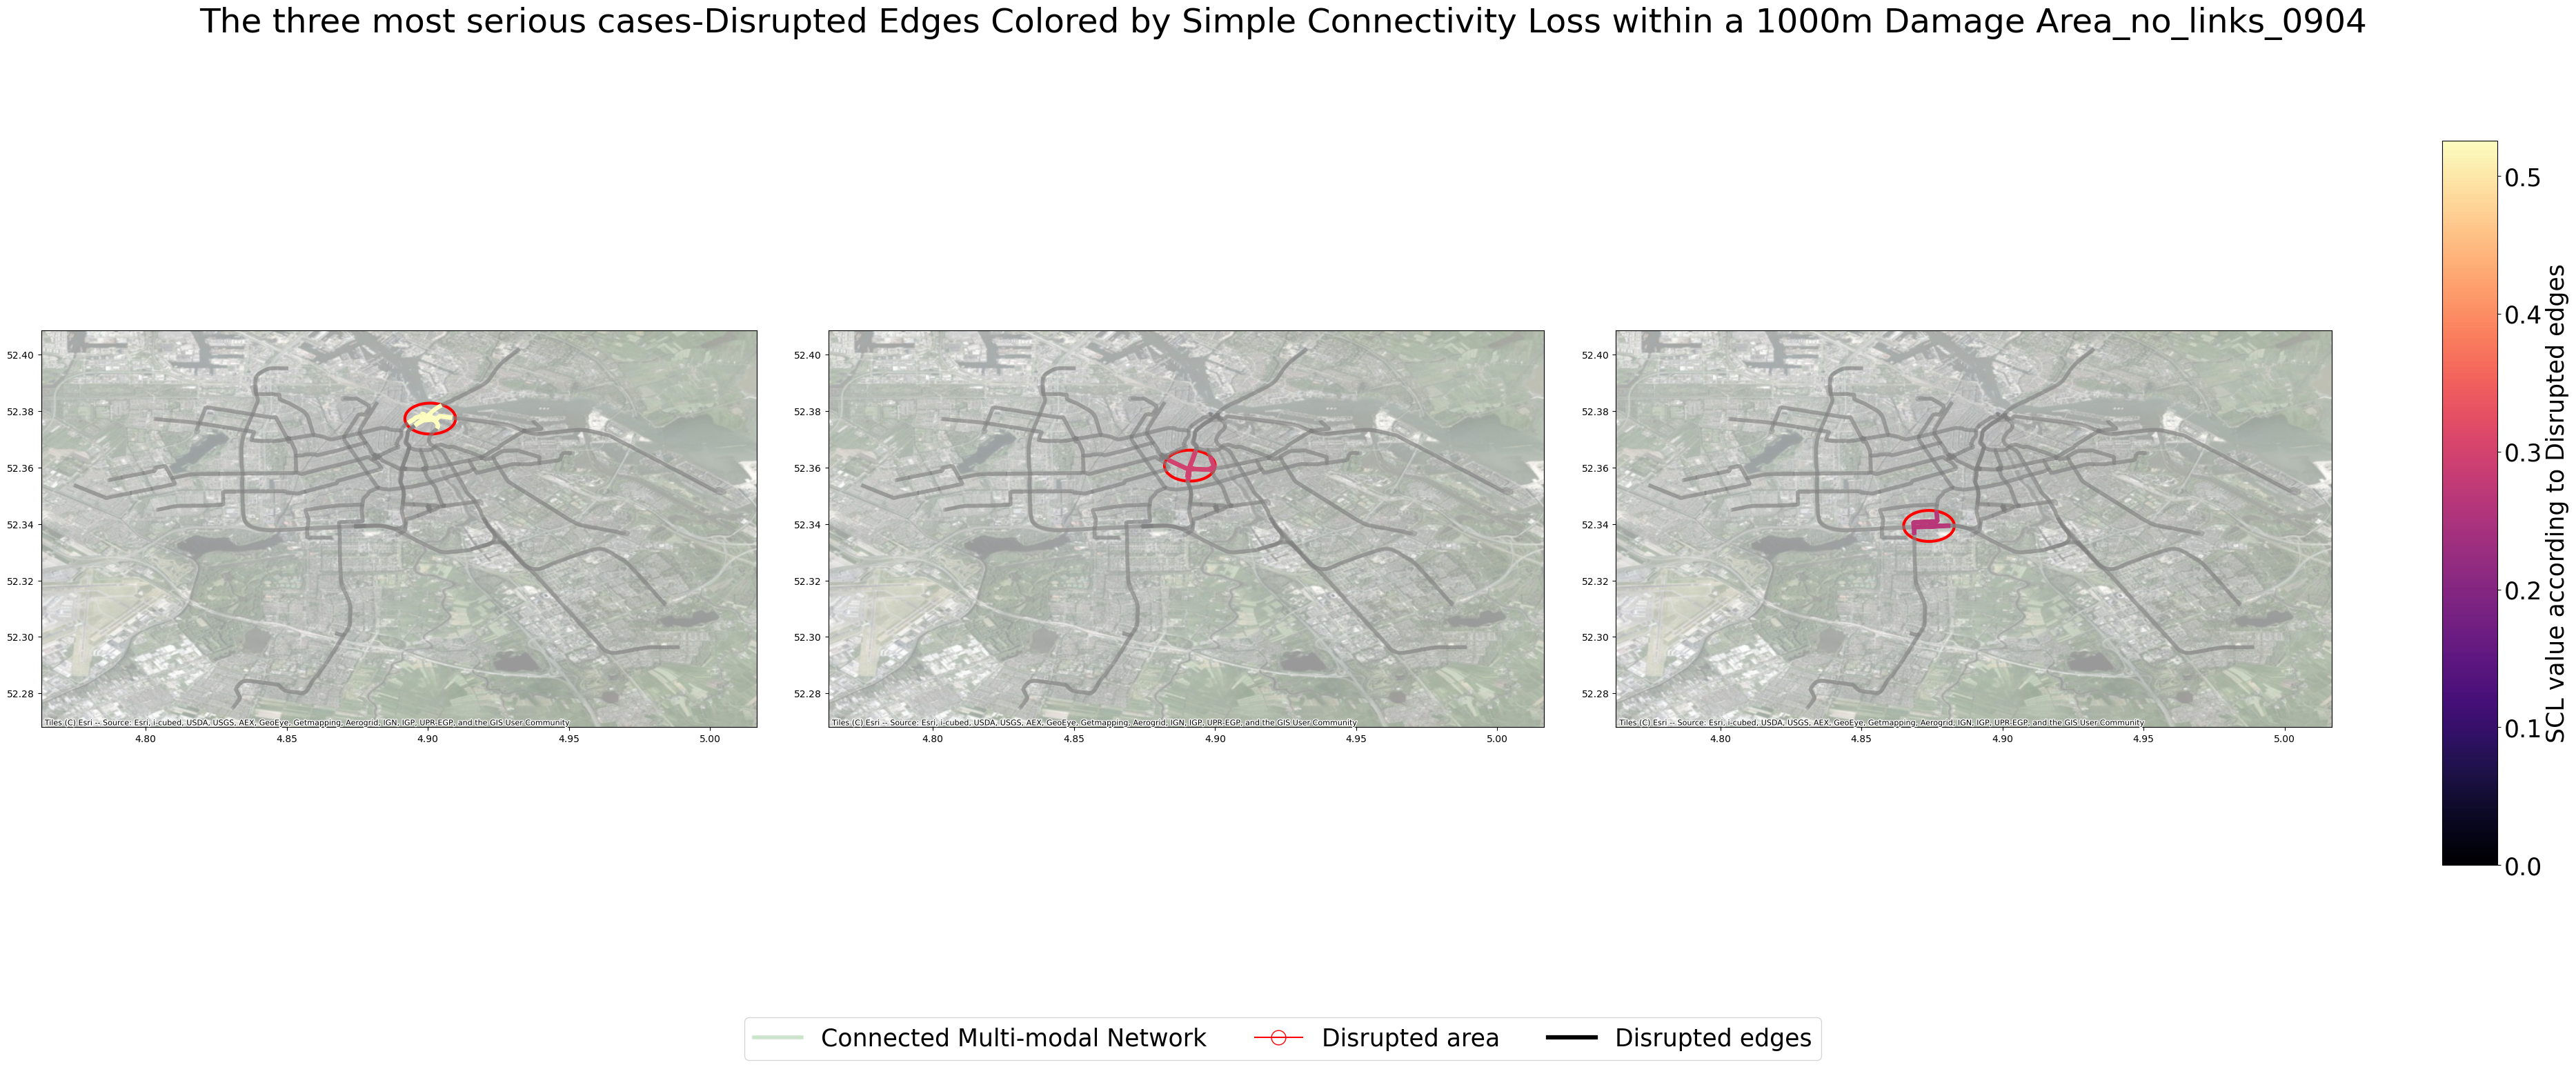

In [201]:
plt_worst_local_disruption_results(worst_scl_each_disruption_1000,city_two_layer_network_edges,combined_removed_edges_df_1000,combined_buffer_df_1000,worst_removed_edges_df_dict_1000,worst_buffer_dict_1000,'The three most serious cases-Disrupted Edges Colored by Simple Connectivity Loss within a 1000m Damage Area_no_links_0904')

In [202]:
worst_scl_each_disruption_1000

simple_connectivity_loss
0                   0.525315
11                  0.298068
7                   0.265724

In [203]:
scl_each_disruption_2000,removed_edges_df_dict_2000,buffer_dict_2000,combined_removed_edges_df_2000,combined_buffer_df_2000 = local_disruption_function(local_attack_center_points,2000,city_two_layer_network_edges,city_two_layer_network_nodes,OD_id_pairs_df,destination_id_df)

In [204]:
scl_each_disruption_2000

simple_connectivity_loss
0                   0.525315
1                   0.185579
2                   0.060606
3                   0.060606
4                   0.246185
5                   0.325253
6                   0.124890
7                   0.382357
8                   0.109091
9                   0.590262
10                  0.404403
11                  0.687231
12                  0.605128
13                  0.109091
14                  0.242590
15                  0.518757
16                  0.690909
17                  0.525315
18                  0.243761
19                  0.186750
20                  0.246185
21                  0.276768
22                  0.337602

In [205]:
# plt_local_disruption_results(scl_each_disruption_2000,city_two_layer_network_edges,combined_removed_edges_df_2000,combined_buffer_df_2000,removed_edges_df_dict_2000,buffer_dict_2000,'Disrupted Edges Colored by Simple Connectivity Loss within a 1000m Damage Area')

In [206]:
worst_scl_each_disruption_2000,worst_index_list,worst_removed_edges_df_dict_2000,worst_buffer_dict_2000 = worst_local_disruption_results(scl_each_disruption_2000,removed_edges_df_dict_2000,buffer_dict_2000,combined_removed_edges_df_2000,combined_buffer_df_2000)

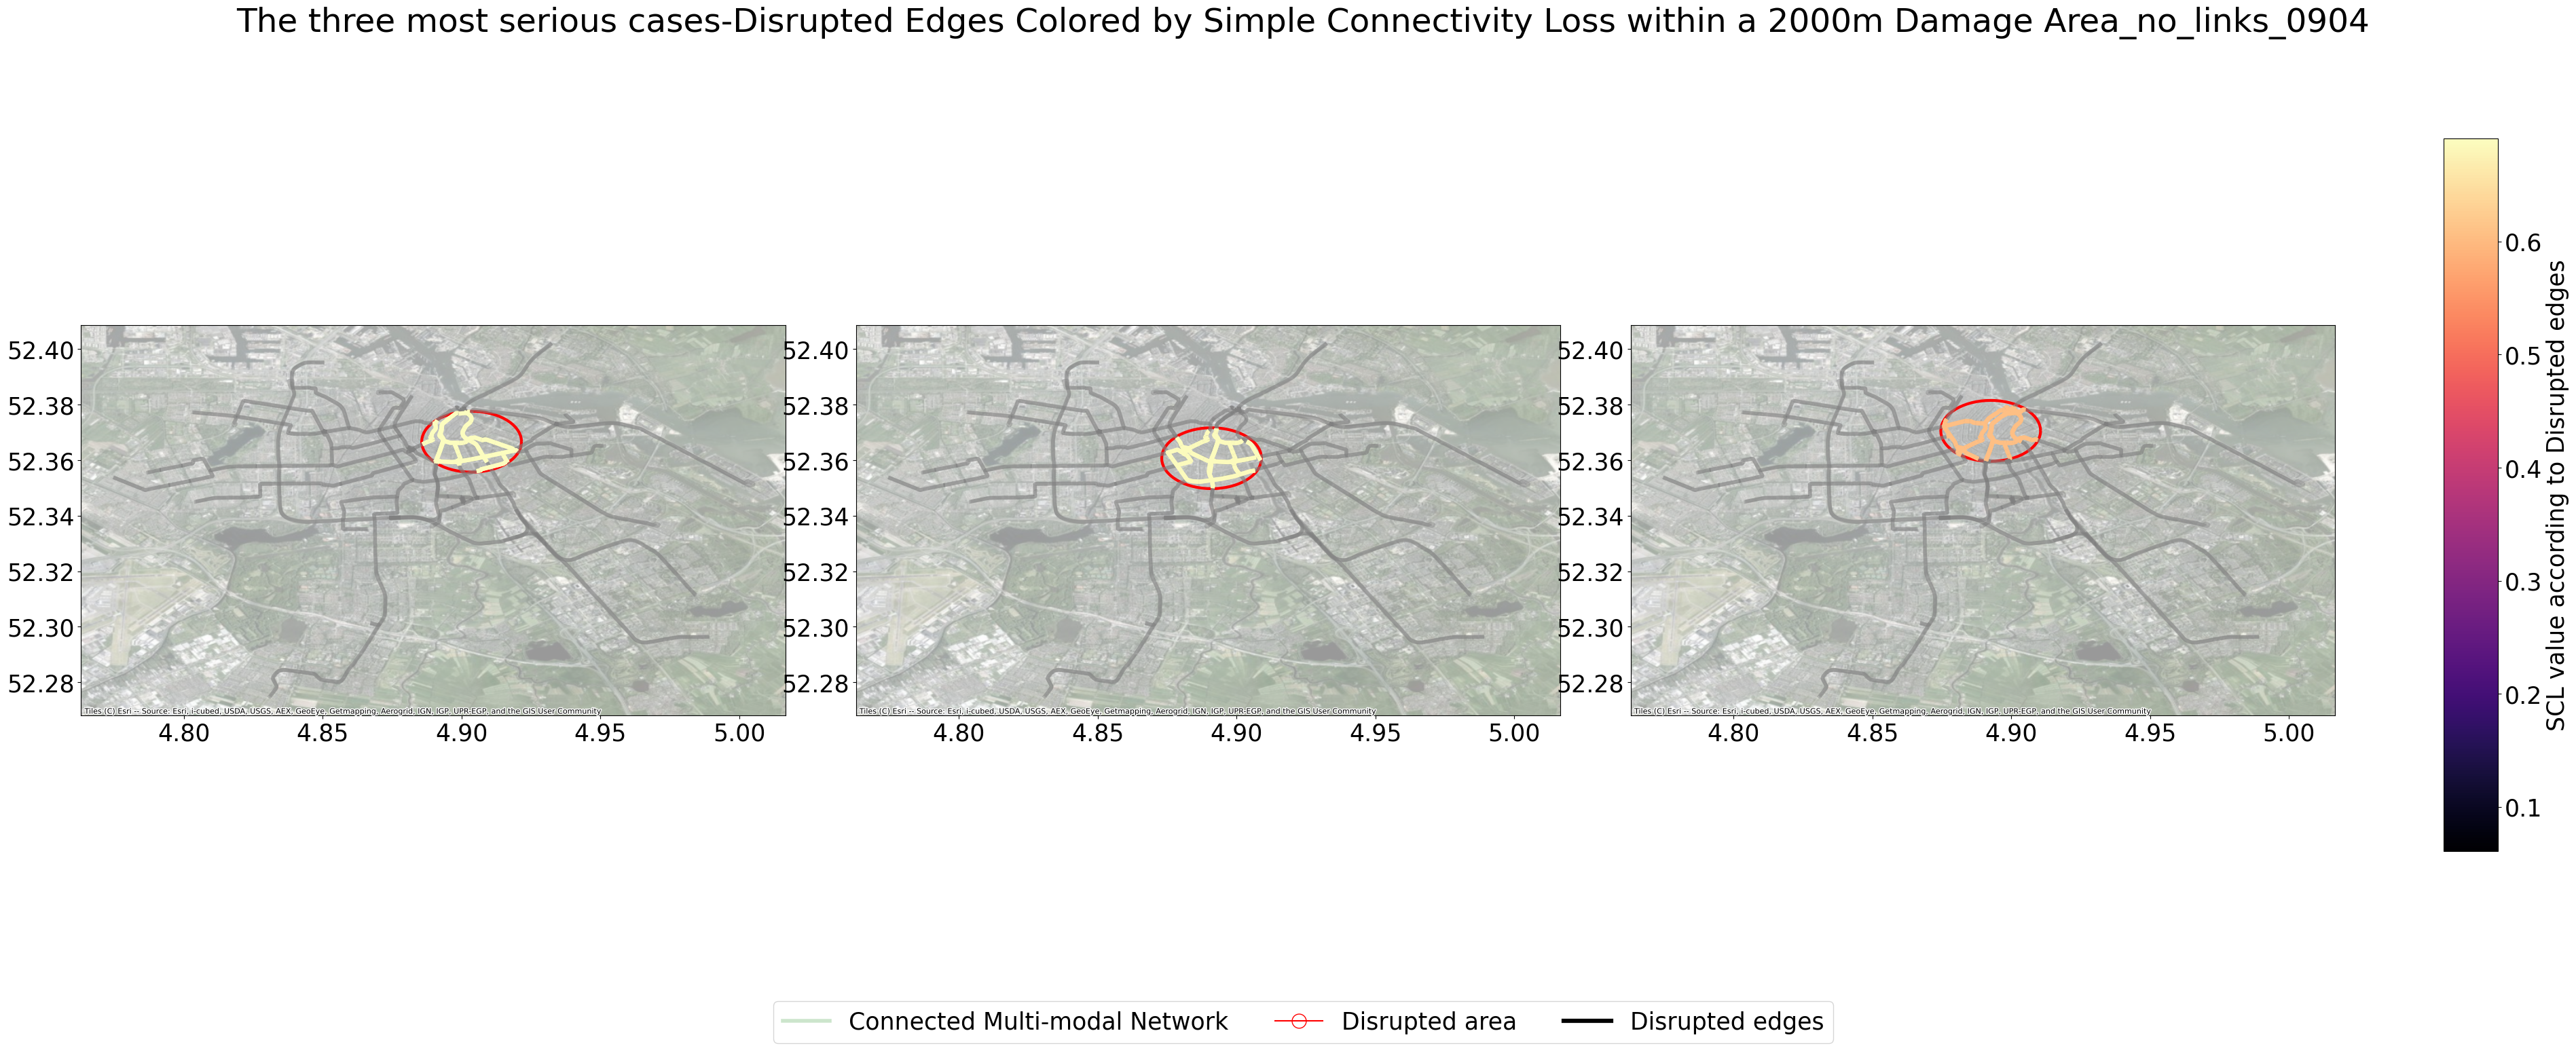

In [207]:
plt_worst_local_disruption_results(worst_scl_each_disruption_2000,city_two_layer_network_edges,combined_removed_edges_df_2000,combined_buffer_df_2000,worst_removed_edges_df_dict_2000,worst_buffer_dict_2000,'The three most serious cases-Disrupted Edges Colored by Simple Connectivity Loss within a 2000m Damage Area_no_links_0904')

In [208]:
worst_scl_each_disruption_2000

simple_connectivity_loss
16                  0.690909
11                  0.687231
12                  0.605128

In [209]:
scl_each_disruption_3000,removed_edges_df_dict_3000,buffer_dict_3000,combined_removed_edges_df_3000,combined_buffer_df_3000 = local_disruption_function(local_attack_center_points,3000,city_two_layer_network_edges,city_two_layer_network_nodes,OD_id_pairs_df,destination_id_df)

In [210]:
scl_each_disruption_3000

simple_connectivity_loss
0                   0.605128
1                   0.388045
2                   0.109091
3                   0.060606
4                   0.355359
5                   0.437037
6                   0.243761
7                   0.437037
8                   0.109091
9                   0.738140
10                  0.437037
11                  0.814369
12                  0.824895
13                  0.202466
14                  0.597493
15                  0.771841
16                  0.803263
17                  0.783963
18                  0.246185
19                  0.357783
20                  0.303196
21                  0.382357
22                  0.485522

In [211]:
# plt_local_disruption_results(scl_each_disruption_3000,city_two_layer_network_edges,combined_removed_edges_df_3000,combined_buffer_df_3000,removed_edges_df_dict_3000,buffer_dict_3000,'Disrupted Edges Colored by Simple Connectivity Loss within a 1000m Damage Area')

In [212]:
worst_scl_each_disruption_3000,worst_index_list,worst_removed_edges_df_dict_3000,worst_buffer_dict_3000 = worst_local_disruption_results(scl_each_disruption_3000,removed_edges_df_dict_3000,buffer_dict_3000,combined_removed_edges_df_3000,combined_buffer_df_3000)

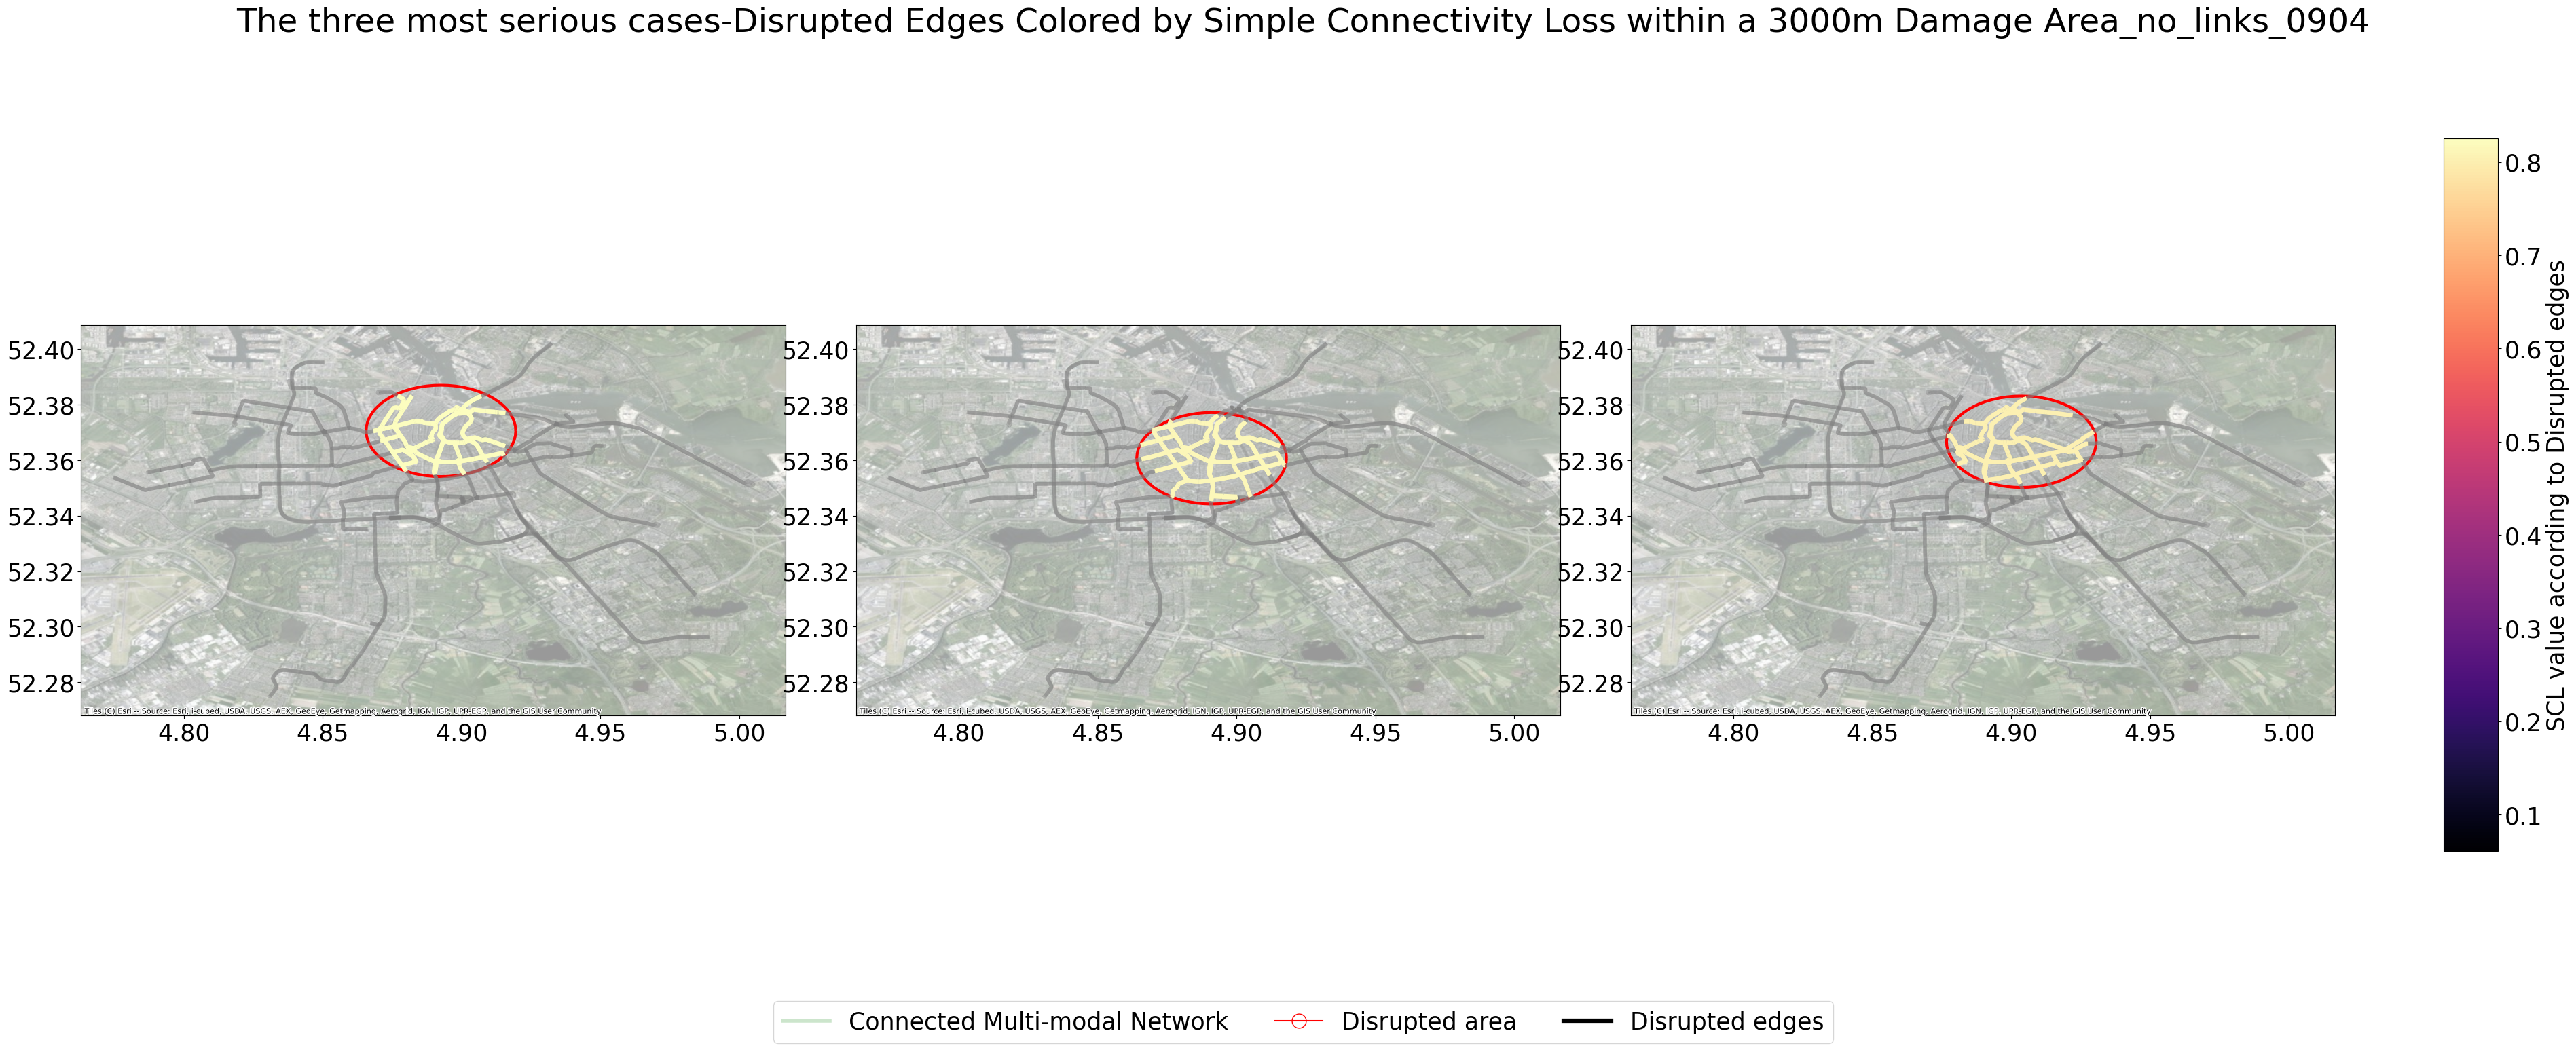

In [213]:
plt_worst_local_disruption_results(worst_scl_each_disruption_3000,city_two_layer_network_edges,combined_removed_edges_df_3000,combined_buffer_df_3000,worst_removed_edges_df_dict_3000,worst_buffer_dict_3000,'The three most serious cases-Disrupted Edges Colored by Simple Connectivity Loss within a 3000m Damage Area_no_links_0904')

In [214]:
worst_scl_each_disruption_3000

simple_connectivity_loss
12                  0.824895
11                  0.814369
16                  0.803263

# Create Connect Edges in 300m for Metro and Tram

In [168]:
buffer_radius = 300

In [169]:
sub_new_stations_buffer_geometry = new_nodes_buffer(city_sub_new_stations,buffer_radius)
sub_new_stations_buffer_geometry

id                        geometry  degree                 name  \
0   328  POINT (555390.884 6853898.052)       2                 Gein   
1   855  POINT (553703.169 6853757.861)       2           Reigersbos   
2   854   POINT (552158.745 6854212.08)       2          Holendrecht   
3   810   POINT (551268.501 6855802.63)       2            Bullewijk   
4   809  POINT (550766.294 6856701.528)       2        Bijlmer ArenA   
..  ...                             ...     ...                  ...   
82  824  POINT (552961.225 6859717.546)       2    Verrijn Stuartweg   
83  823  POINT (551775.962 6860088.944)       2  Station Diemen Zuid   
84  829   POINT (550617.07 6859438.093)       2         Venserpolder   
85  827  POINT (548836.771 6859966.806)       2      Van der Madeweg   
86  833  POINT (547808.268 6861889.144)       2           Spaklerweg   

       geo_x      geo_y         coordinate_value  \
0   4.989161  52.296407  (4.9891612, 52.2964067)   
1   4.974000  52.295637  (4.9740002, 52.2956365)   
2   4.960126  52.298132  (4.9601264, 52.2981319)   
3   4.952129  52.306869   (4.9521292, 52.306869)   
4   4.947618  52.311806   (4.9476178, 52.311806)   
..       ...        ...                      ...   
82  4.967335  52.328367  (4.9673352, 52.3283668)   
83  4.956688  52.330406  (4.9566878, 52.3304057)   
84  4.946277  52.326833  (4.9462773, 52.3268326)   
85  4.930285  52.329735  (4.9302846, 52.3297352)   
86  4.921045  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route         ref    transfer  \
0               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
1               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
2               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
3               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
4               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
..                                        ...     ...         ...         ...   
82  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
83  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
84  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
85  Metro 53: Gaasperplas => Centraal Station  subway  50, 53, 54  50, 53, 54   
86  Metro 53: Gaasperplas => Centraal Station  subway  51, 53, 54  51, 53, 54   

                                      buffer_geometry  
0   POLYGON ((555690.884 6853898.052, 555689.44 68...  
1   POLYGON ((554003.169 6853757.861, 554001.725 6...  
2   POLYGON ((552458.745 6854212.08, 552457.301 68...  
3   POLYGON ((551568.501 6855802.63, 551567.056 68...  
4   POLYGON ((551066.294 6856701.528, 551064.85 68...  
..                                                ...  
82  POLYGON ((553261.225 6859717.546, 553259.78 68...  
83  POLYGON ((552075.962 6860088.944, 552074.517 6...  
84  POLYGON ((550917.07 6859438.093, 550915.626 68...  
85  POLYGON ((549136.771 6859966.806, 549135.327 6...  
86  POLYGON ((548108.268 6861889.144, 548106.824 6...  

[87 rows x 12 columns]

In [170]:
city_tram_new_stations_ftn = add_footnote_to_new_nodes(city_tram_new_stations)
city_tram_new_stations_ftn

id_tram                   geometry_tram  degree_tram  \
0       2209  POINT (549095.945 6865626.846)            2   
1       2371  POINT (548687.336 6865651.437)            2   
2       2474  POINT (548326.739 6865502.838)            2   
3       2480  POINT (547329.238 6865312.719)            2   
4       2466  POINT (546978.593 6865909.649)            2   
..       ...                             ...          ...   
413     2427   POINT (548393.23 6866966.046)            2   
414     2676   POINT (548760.528 6867340.75)            2   
415     2383  POINT (549343.063 6867853.627)            2   
416     2619  POINT (549714.592 6867935.478)            2   
417     1282  POINT (549622.943 6868547.883)            2   

                     name_tram  geo_x_tram  geo_y_tram  \
0           Muiderpoortstation    4.932613   52.360796   
1                 Dapperstraat    4.928942   52.360931   
2               Linnaeusstraat    4.925703   52.360116   
3                    Beukenweg    4.916742   52.359073   
4    Korte 's-Gravesandestraat    4.913592   52.362348   
..                         ...         ...         ...   
413      Eerste Coehoornstraat    4.926300   52.368143   
414    Eerste Leeghwaterstraat    4.929600   52.370198   
415               Rietlandpark    4.934833   52.373011   
416        C. van Eesterenlaan    4.938170   52.373460   
417                 Azartplein    4.937347   52.376818   

       coordinate_value_tram  \
0    (4.9326128, 52.3607965)   
1    (4.9289422, 52.3609314)   
2    (4.9257029, 52.3601162)   
3    (4.9167422, 52.3590732)   
4    (4.9135923, 52.3623479)   
..                       ...   
413  (4.9263002, 52.3681426)   
414  (4.9295997, 52.3701978)   
415  (4.9348327, 52.3730107)   
416  (4.9381702, 52.3734596)   
417  (4.9373469, 52.3768181)   

                                  route_name_list_tram route_tram  ref_tram  \
0    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...       tram      1, 3   
1    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...       tram      1, 3   
2    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...       tram      1, 3   
3    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...       tram      1, 3   
4    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...       tram  1, 19, 7   
..                                                 ...        ...       ...   
413  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...       tram         7   
414  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...       tram         7   
415  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...       tram     26, 7   
416  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...       tram         7   
417  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...       tram         7   

    transfer_tram  
0            1, 3  
1            1, 3  
2            1, 3  
3            1, 3  
4        1, 19, 7  
..            ...  
413          None  
414          None  
415         26, 7  
416          None  
417          None  

[418 rows x 11 columns]

In [171]:
transfer_stations_sub_to_tram = transfer_A_to_B(sub_new_stations_buffer_geometry,city_tram_new_stations_ftn)
transfer_stations_sub_to_tram

id                                      geometry degree  \
0    819   POINT (547403.1208118391 6863046.022174509)      2   
1    820    POINT (547411.0022317873 6863048.24534716)      2   
2    834   POINT (540744.7124492757 6861534.261047471)      2   
3    834   POINT (540744.7124492757 6861534.261047471)      2   
4    835   POINT (540742.3190802236 6861559.002901717)      2   
..   ...                                           ...    ...   
109  138  POINT (546346.9548790398 6865723.4216876915)      2   
110  460   POINT (546339.0511951934 6865720.341024122)      2   
111  460   POINT (546339.0511951934 6865720.341024122)      2   
112  840   POINT (542567.1127011032 6861713.358806675)      2   
113  840   POINT (542567.1127011032 6861713.358806675)      2   

                name     geo_x      geo_y         coordinate_value  \
0      Amstelstation  4.917406  52.346636  (4.9174059, 52.3466361)   
1      Amstelstation  4.917477  52.346648  (4.9174767, 52.3466483)   
2    Amstelveenseweg  4.857592  52.338339  (4.8575924, 52.3383393)   
3    Amstelveenseweg  4.857592  52.338339  (4.8575924, 52.3383393)   
4    Amstelveenseweg  4.857571  52.338475  (4.8575709, 52.3384751)   
..               ...       ...        ...                      ...   
109     Weesperplein  4.907918  52.361326  (4.9079182, 52.3613263)   
110     Weesperplein  4.907847  52.361309  (4.9078472, 52.3613094)   
111     Weesperplein  4.907847  52.361309  (4.9078472, 52.3613094)   
112             Zuid  4.873963  52.339322  (4.8739633, 52.3393223)   
113             Zuid  4.873963  52.339322  (4.8739633, 52.3393223)   

                               route_name_list   route         ref  ...  \
0    Metro 51: Centraal Station => Isolatorweg  subway  51, 53, 54  ...   
1    Metro 51: Isolatorweg => Centraal Station  subway  51, 53, 54  ...   
2                Metro 50: Isolatorweg => Gein  subway      50, 51  ...   
3                Metro 50: Isolatorweg => Gein  subway      50, 51  ...   
4                Metro 50: Gein => Isolatorweg  subway      50, 51  ...   
..                                         ...     ...         ...  ...   
109  Metro 51: Isolatorweg => Centraal Station  subway  51, 53, 54  ...   
110  Metro 51: Centraal Station => Isolatorweg  subway  51, 53, 54  ...   
111  Metro 51: Centraal Station => Isolatorweg  subway  51, 53, 54  ...   
112              Metro 50: Gein => Isolatorweg  subway  50, 51, 52  ...   
113              Metro 50: Gein => Isolatorweg  subway  50, 51, 52  ...   

                      geometry_tram degree_tram        name_tram geo_x_tram  \
0    POINT (547457.512 6863193.427)           2    Amstelstation   4.917895   
1    POINT (547457.512 6863193.427)           2    Amstelstation   4.917895   
2    POINT (540706.441 6861549.328)           2  Amstelveenseweg   4.857249   
3    POINT (540712.274 6861514.766)           2  Amstelveenseweg   4.857301   
4    POINT (540706.441 6861549.328)           2  Amstelveenseweg   4.857249   
..                              ...         ...              ...        ...   
109  POINT (546258.244 6865664.324)           2     Weesperplein   4.907121   
110  POINT (546485.013 6865737.622)           2     Weesperplein   4.909158   
111  POINT (546258.244 6865664.324)           2     Weesperplein   4.907121   
112  POINT (542480.462 6861985.602)           2     Station Zuid   4.873185   
113  POINT (542567.725 6861986.732)           2     Station Zuid   4.873969   

     geo_y_tram    coordinate_value_tram  \
0     52.347445   (4.9178945, 52.347445)   
1     52.347445   (4.9178945, 52.347445)   
2     52.338422   (4.8572486, 52.338422)   
3     52.338232   (4.857301, 52.3382323)   
4     52.338422   (4.8572486, 52.338422)   
..          ...                      ...   
109   52.361002  (4.9071213, 52.3610021)   
110   52.361404  (4.9091584, 52.3614042)   
111   52.361002  (4.9071213, 52.3610021)   
112   52.340817  (4.8731849, 52.3408165)   
113   52.340823  (4.8739688, 52.3408227)   

     

In [172]:
transfer_stations_sub_to_tram.loc[:,['name','name_tram']]

name        name_tram
0      Amstelstation    Amstelstation
1      Amstelstation    Amstelstation
2    Amstelveenseweg  Amstelveenseweg
3    Amstelveenseweg  Amstelveenseweg
4    Amstelveenseweg  Amstelveenseweg
..               ...              ...
109     Weesperplein     Weesperplein
110     Weesperplein     Weesperplein
111     Weesperplein     Weesperplein
112             Zuid     Station Zuid
113             Zuid     Station Zuid

[114 rows x 2 columns]

In [173]:
# transfer_stations_sub_to_tram.to_excel('transfer_stations_sub_to_tram_0426.xlsx',header = True,index = False)

In [174]:
connect_edges_sub_to_tram = create_connect_edges(transfer_stations_sub_to_tram)
connect_edges_sub_to_tram

geometry  from_id  to_id  \
0    LINESTRING (4.9174059 52.3466361, 4.9178945 52...      819   2101   
1    LINESTRING (4.9174767 52.3466483, 4.9178945 52...      820   2101   
2    LINESTRING (4.8575924 52.3383393, 4.8572486 52...      834   2515   
3    LINESTRING (4.8575924 52.3383393, 4.857301 52....      834   2516   
4    LINESTRING (4.8575709 52.3384751, 4.8572486 52...      835   2515   
..                                                 ...      ...    ...   
109  LINESTRING (4.9071213 52.3610021, 4.9079182 52...     2448    138   
110  LINESTRING (4.9091584 52.3614042, 4.9078472 52...     2449    460   
111  LINESTRING (4.9071213 52.3610021, 4.9078472 52...     2448    460   
112  LINESTRING (4.8731849 52.3408165, 4.8739633 52...     1068    840   
113  LINESTRING (4.8739688 52.3408227, 4.8739633 52...     2300    840   

         from_to      to_from  
0    (819, 2101)  (2101, 819)  
1    (820, 2101)  (2101, 820)  
2    (834, 2515)  (2515, 834)  
3    (834, 2516)  (2516, 834)  
4    (835, 2515)  (2515, 835)  
..           ...          ...  
109  (2448, 138)  (138, 2448)  
110  (2449, 460)  (460, 2449)  
111  (2448, 460)  (460, 2448)  
112  (1068, 840)  (840, 1068)  
113  (2300, 840)  (840, 2300)  

[228 rows x 5 columns]

In [175]:
start_id_for_connect_edges_sub_to_tram = city_tram_connected_edges['id'].iloc[-1] + 1
start_id_for_connect_edges_sub_to_tram

np.int64(3342)

In [176]:
connect_edges_sub_to_tram_id_list = [start_id_for_connect_edges_sub_to_tram] + [i for i in range(start_id_for_connect_edges_sub_to_tram + 1, start_id_for_connect_edges_sub_to_tram + len(connect_edges_sub_to_tram))]
# connect_edges_sub_to_tram_id_list

In [177]:
connect_edges_sub_to_tram['id'] = connect_edges_sub_to_tram_id_list

# Set weights attribute of connecting edges to a value much more higher than the maximum value in city_sub_new_edges to avoid frequently transfer: 15 min/60 min*25000 m/h
# connect_edges_sub_to_tram['weights'] = city_sub_new_edges.sort_values(by='distance').distance.iloc[-1] + city_tram_new_edges.sort_values(by='distance').distance.iloc[-1] + 15/60*25000
connect_edges_sub_to_tram['weights'] = 15/60*25000
# Set time attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges and city_tram_new_edges: 15mins for passengers' walking transfer
connect_edges_sub_to_tram['time'] = 15
# connect_edges_sub_to_tram['wcl_weights'] = 300
# connect_edges_sub_to_tram['wcl_weights'] = 500
# connect_edges_sub_to_tram['wcl_weights'] = 600
# connect_edges_sub_to_tram['wcl_weights'] = 700
# connect_edges_sub_to_tram['wcl_weights'] = 800
# connect_edges_sub_to_tram['wcl_weights'] = 1200
# connect_edges_sub_to_tram['wcl_weights'] = 900
# connect_edges_sub_to_tram['wcl_weights'] = 960
# connect_edges_sub_to_tram['wcl_weights'] = 980
# connect_edges_sub_to_tram['wcl_weights'] = 1000
# connect_edges_sub_to_tram['wcl_weights'] = 1100

In [178]:
def project_geometry(geom):
    transformer = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)
    coords = [transformer.transform(x, y) for x, y in geom.coords]
    return LineString(coords)


connect_edges_sub_to_tram_gdf = gpd.GeoDataFrame(connect_edges_sub_to_tram.copy(), geometry='geometry', crs="EPSG:4326")

connect_edges_sub_to_tram_3857 = connect_edges_sub_to_tram_gdf.copy()
connect_edges_sub_to_tram_3857['geometry'] = connect_edges_sub_to_tram_3857['geometry'].apply(lambda geom: project_geometry(geom))


connect_edges_sub_to_tram['distance'] = connect_edges_sub_to_tram_3857['geometry'].length

In [179]:
connect_edges_sub_to_tram

geometry  from_id  to_id  \
0    LINESTRING (4.9174059 52.3466361, 4.9178945 52...      819   2101   
1    LINESTRING (4.9174767 52.3466483, 4.9178945 52...      820   2101   
2    LINESTRING (4.8575924 52.3383393, 4.8572486 52...      834   2515   
3    LINESTRING (4.8575924 52.3383393, 4.857301 52....      834   2516   
4    LINESTRING (4.8575709 52.3384751, 4.8572486 52...      835   2515   
..                                                 ...      ...    ...   
109  LINESTRING (4.9071213 52.3610021, 4.9079182 52...     2448    138   
110  LINESTRING (4.9091584 52.3614042, 4.9078472 52...     2449    460   
111  LINESTRING (4.9071213 52.3610021, 4.9078472 52...     2448    460   
112  LINESTRING (4.8731849 52.3408165, 4.8739633 52...     1068    840   
113  LINESTRING (4.8739688 52.3408227, 4.8739633 52...     2300    840   

         from_to      to_from    id  weights  time    distance  
0    (819, 2101)  (2101, 819)  3342   6250.0    15  157.119611  
1    (820, 2101)  (2101, 820)  3343   6250.0    15  152.449552  
2    (834, 2515)  (2515, 834)  3344   6250.0    15   41.130821  
3    (834, 2516)  (2516, 834)  3345   6250.0    15   37.845699  
4    (835, 2515)  (2515, 835)  3346   6250.0    15   37.159734  
..           ...          ...   ...      ...   ...         ...  
109  (2448, 138)  (138, 2448)  3565   6250.0    15  106.592997  
110  (2449, 460)  (460, 2449)  3566   6250.0    15  146.981525  
111  (2448, 460)  (460, 2448)  3567   6250.0    15   98.324093  
112  (1068, 840)  (840, 1068)  3568   6250.0    15  285.700786  
113  (2300, 840)  (840, 2300)  3569   6250.0    15  273.373853  

[228 rows x 9 columns]

In [180]:
connect_edges_sub_to_tram.sort_values(by='distance')

geometry  from_id  to_id  \
82   LINESTRING (4.8344667 52.3580615, 4.834559 52....      843   2401   
82   LINESTRING (4.834559 52.3578798, 4.8344667 52....     2401    843   
21   LINESTRING (4.9009807 52.3777002, 4.9010471 52...     2776    728   
21   LINESTRING (4.9010471 52.3775081, 4.9009807 52...      728   2776   
4    LINESTRING (4.8572486 52.338422, 4.8575709 52....     2515    835   
..                                                 ...      ...    ...   
112  LINESTRING (4.8731849 52.3408165, 4.8739633 52...     1068    840   
68   LINESTRING (4.8922816 52.3404324, 4.8914299 52...     2628    859   
68   LINESTRING (4.8914299 52.3419224, 4.8922816 52...      859   2628   
105  LINESTRING (4.9037527 52.3666905, 4.9053602 52...      137   2367   
105  LINESTRING (4.9053602 52.3679611, 4.9037527 52...     2367    137   

         from_to      to_from    id  weights  time    distance  
82   (843, 2401)  (2401, 843)  3424   6250.0    15   34.676382  
82   (2401, 843)  (843, 2401)  3538   6250.0    15   34.676382  
21   (2776, 728)  (728, 2776)  3477   6250.0    15   35.801741  
21   (728, 2776)  (2776, 728)  3363   6250.0    15   35.801741  
4    (2515, 835)  (835, 2515)  3460   6250.0    15   37.159734  
..           ...          ...   ...      ...   ...         ...  
112  (1068, 840)  (840, 1068)  3568   6250.0    15  285.700786  
68   (2628, 859)  (859, 2628)  3524   6250.0    15  287.564310  
68   (859, 2628)  (2628, 859)  3410   6250.0    15  287.564310  
105  (137, 2367)  (2367, 137)  3447   6250.0    15  292.714426  
105  (2367, 137)  (137, 2367)  3561   6250.0    15  292.714426  

[228 rows x 9 columns]

In [181]:
# city_sub_new_stations

In [182]:
# city_tram_new_stations